# Frame the Problem and Look at the Big Picture

## Define the objective in business terms.

## How will your solution be used?

## What are the current solutions/workarounds (if any)?

## How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

## How should performance be measured?

## Is the performance measure aligned with the business objective?

## What would be the minimum performance needed to reach the business objective?

## What are comparable problems? Can you reuse experience or tools?

## Is human expertise available?

## How would you solve the problem manually?

## List the assumptions you (or others) have made so far.

## Very assumptions if possible.

# Get the Data

## List the data you need and how much you need.

## Find and document where you can get that data.

## Check how much space it will take.

## Check legal obligations, and get authorization if necessary.

## Get access authorizations.

## Create a workspace (with enough storage space).

## Get the data

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
print(mnist.keys())
print(mnist)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.

## Convert the data to a format you can easily manipulate (without changing the data itself).

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [3]:
import numpy as np
from sklearn import preprocessing

y = y.astype(np.uint8)
classes = y.drop_duplicates().sort_values().tolist()

## Ensure sensitive information is deleted or protected (eg. anonymized).

## Check the size and type of data (time series, sample, geographical, etc.).

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None


In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


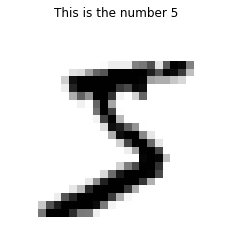

In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt

i = 0
some_digit = X.iloc[i]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.title(f"This is the number {y[i]}")
plt.axis("off")
plt.show()

## Sample a test set, put it aside, and never look at it (no data snooping!).

### Stratified sampling

In [7]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

shuffle_index = np.random.permutation(y_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

shuffle_index = np.random.permutation(y_test.shape[0])
X_test, y_test = X_test.iloc[shuffle_index], y_test.iloc[shuffle_index]

# Explore the Data

## Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

## Study each attribute and its characteristics.
- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
- Type of distribution (Gaussian, uniform, logarithmic, etc.)

## For supervised learning tasks, identify the target attribute(s).

## Visualize the data

## Study the correlations between attributes.

## Study how you would solve the problem manually.

## Identify the promising transformations you may want to apply.

## Identify extra data that would be useful.

## Document what you have learned.

# Prepare the Data
- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply.
    - So you can easily prepare the data the next time you get a fresh dataset
    - So you can apply these transformations in future projects
    - To clean and prepare the test set
    - To clean and prepare new data instances once your solution is live
    - To make it easy to treat your preparation choices as hyperparameters

## Data cleaning.
- Fix or remove outliers (optional)
- Fill in missing values (e.g., with zeros, mean, median...) or drop their rows (or columns) 

## Feature selection (optional).
- Drop the attributes that provide no useful information for the task
- Use some dimensionality reduction technique if necessary (PCA, KernelPCA, LLE...)

## Feature engineering, where appropriate.
- Discretize continuous features
- Decompose features (e.g., categorical, date/time, etc.)
- Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.)
- Aggregate features into promising new features

## Feauture scaling
- Standardize or normalize features

In [8]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Reconstruct data
- Use pipelines to automate all steps if possible.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train_prepared = num_pipeline.fit_transform(X_train)

# Shortlisting Promising Models
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.

## Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.

In [10]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import pandas as pd

def plot_normalized_confusion_matrix(confusion_matrix):
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
def accuracy_scores(confusion_matrix):
    msg = "accuracy\n\n"
    accuracies = []
    for i in range(confusion_matrix.shape[0]):
        tp = confusion_matrix[i][i]
        fn = sum(np.delete(confusion_matrix[i], i))
        fp = sum(np.delete(confusion_matrix[:, i], i))
        tn = sum(sum(np.delete(np.delete(confusion_matrix, i, 0), i, 1)))
        accuracy = (tp+tn)/(tp+  fn+  fp+  tn)
        accuracies.append(accuracy)
        msg += str(round(accuracy,2))+"\n"
    msg += f"accuracy avg: {round(np.mean(accuracies),2)}\n\n"
    return msg
    
class analyze_classifier():
    def __init__(self, classifier, X, y, y_score=np.array([])):
        
        if len(y_score)==0:
            try:
                self.y_score = classifier.decision_function(X)
            except:
                self.y_score = classifier.predict_proba(X)
        else:
            self.y_score = y_score
        self.classifier = classifier
        self.X = X
        self.y = y
        self.y_binarized = label_binarize(y, classes=classifier.classes_)
        self.precision, self.recall, self.threshold, self.average_precision = self.get_precision_recall_classes()
        self.fpr, self.tpr, self.roc_auc = self.get_roc_auc_classes()
        self.colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "red", "green", "black", "blue", "pink"])

        
    def get_precision_recall_classes(self):
        
        # For each class
        precision = dict()
        recall = dict()
        average_precision = dict()
        threshold = dict()
        for i in range(self.classifier.n_classes_):
            precision[i], recall[i], threshold[i] = precision_recall_curve(self.y_binarized[:, i], self.y_score[:, i])
            average_precision[i] = average_precision_score(self.y_binarized[:, i], self.y_score[:, i])
            
        # A "micro-average": quantifying score on all classes jointly       
        precision["micro"], recall["micro"], threshold["micro"] = precision_recall_curve(
            self.y_binarized.ravel(), 
            self.y_score.ravel()
        )
        average_precision["micro"] = average_precision_score(self.y_binarized, self.y_score, average="micro")
        
        return precision, recall, threshold, average_precision
        
    def get_roc_auc_classes(self):
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(self.classifier.n_classes_):
            fpr[i], tpr[i], _ = roc_curve(self.y_binarized[:, i], self.y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(self.y_binarized.ravel(), self.y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(self.classifier.n_classes_)])) # First aggregate all false positive rates
        mean_tpr = np.zeros_like(all_fpr) # Then interpolate all ROC curves at this points
        for i in range(self.classifier.n_classes_):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= self.classifier.n_classes_ # Finally average it and compute AUC

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        
        return fpr, tpr, roc_auc
    
    def plot_precision_recall_micro(self):
        
        _, ax = plt.subplots(figsize=(16, 9))
        display = PrecisionRecallDisplay(
            recall=self.recall["micro"],
            precision=self.precision["micro"],
            average_precision=self.average_precision["micro"],

        )
        display.plot(ax=ax)
        _ = display.ax_.set_title("Micro-averaged over all classes")
        
    def plot_precision_recall_classes(self):
        
        # setup plot details
        _, ax = plt.subplots(figsize=(16, 9))

        f_scores = np.linspace(0.2, 0.8, num=4)
        lines, labels = [], []
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            y = f_score * x / (2 * x - f_score)
            (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
            plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

        display = PrecisionRecallDisplay(
            recall=self.recall["micro"],
            precision=self.precision["micro"],
            average_precision=self.average_precision["micro"],
        )
        display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

        for i, color in zip(range(self.classifier.n_classes_), self.colors):
            display = PrecisionRecallDisplay(
                recall=self.recall[i],
                precision=self.precision[i],
                average_precision=self.average_precision[i],
            )
            display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

        # add the legend for the iso-f1 curves
        handles, labels = display.ax_.get_legend_handles_labels()
        handles.extend([l])
        labels.extend(["iso-f1 curves"])
        # set the legend and the axes
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.legend(handles=handles, labels=labels, loc="best")
        ax.set_title("Extension of Precision-Recall curve to multi-class")

        plt.show()
        
    def plot_precision_recall_vs_threshold(self, classes_indexes=True):
        
        if classes_indexes==True:
            classes_indexes = list(self.classifier.classes_)
        
        plt.figure(figsize=(16,9))
        for c, color in zip(classes_indexes, self.colors):
            plt.plot(self.threshold[c], self.precision[c][:-1], "--", color=color)
            plt.plot(self.threshold[c], self.recall[c][:-1], "-", label='class {}'.format(c), color=color)
        plt.xlabel("Threshold")
        plt.legend(loc="best")
        plt.title("Precision (--) and Recall (-) vs. Threshold Curve")
        plt.grid(visible=True)
        plt.show()
        
    def plot_roc_micro_macro(self):
        # micro and macro ROC curve
        _, ax = plt.subplots(figsize=(16, 9))
        lw = 2
        ax.plot(
            self.fpr['micro'],
            self.tpr['micro'],
            lw=lw,
            label=("ROC curve micro (area = %0.2f)" % self.roc_auc['micro']),
        )
        ax.plot(
            self.fpr['macro'],
            self.tpr['macro'],
            lw=lw,
            label=("ROC curve micro (area = %0.2f)" % self.roc_auc['macro']),
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic for %s" % self.classifier.get_params()['estimator__steps'][0][-1])
        plt.legend(loc="lower right")
        plt.show()
        
    def plot_roc_classes(self):
        _, ax = plt.subplots(figsize=(16, 9))
        lw = 2
        for c, color in zip(range(self.classifier.n_classes_), self.colors):
            ax.plot(
                self.fpr[c],
                self.tpr[c],
                color=color,
                lw=lw,
                label=("ROC curve for class %d (area = %0.2f)" % (c, self.roc_auc[c])),
            )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic for each class")
        plt.legend(loc="lower right")
        plt.show()

### Stochastic Gradient Descent

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier#, OneVsOneClassifier
from sklearn.pipeline import make_pipeline

sgd_classifier = OneVsRestClassifier(
    make_pipeline(SGDClassifier(random_state=42))
)
sgd_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('sgdclassifier',
                                               SGDClassifier(random_state=42))]))

[[5604    0   12    6    6   28   29    4  234    0]
 [   0 6433   39   18    3   40    4    6  190    9]
 [  19   22 5314   71   60   21   50   34  360    7]
 [  21   16   95 5280    0  169   23   37  435   55]
 [  10   12   32    9 5269    8   27   14  338  123]
 [  25   16   22  134   48 4529   66   12  515   54]
 [  25   15   39    2   31   79 5576    7  144    0]
 [  17   10   48   12   38   12    4 5752  204  168]
 [  12   55   34   89    2  102   27    7 5491   32]
 [  19   19   26   54  105   28    1  148  401 5148]]


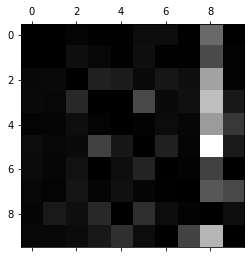

In [12]:
from sklearn.metrics import confusion_matrix
y_train_pred =  sgd_classifier.predict(X_train_prepared)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5923
           1       0.97      0.95      0.96      6742
           2       0.94      0.89      0.91      5958
           3       0.93      0.86      0.89      6131
           4       0.95      0.90      0.92      5842
           5       0.90      0.84      0.87      5421
           6       0.96      0.94      0.95      5918
           7       0.96      0.92      0.94      6265
           8       0.66      0.94      0.78      5851
           9       0.92      0.87      0.89      5949

    accuracy                           0.91     60000
   macro avg       0.92      0.91      0.91     60000
weighted avg       0.92      0.91      0.91     60000



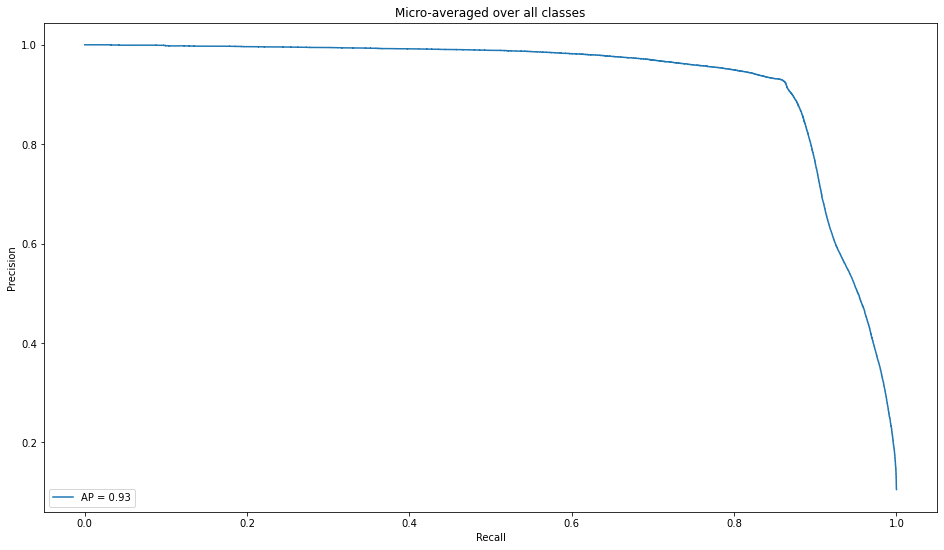

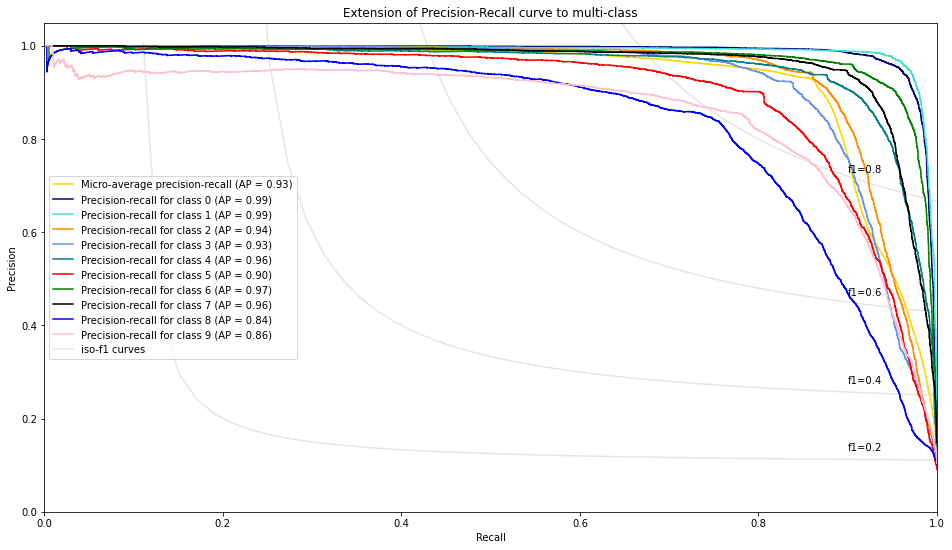

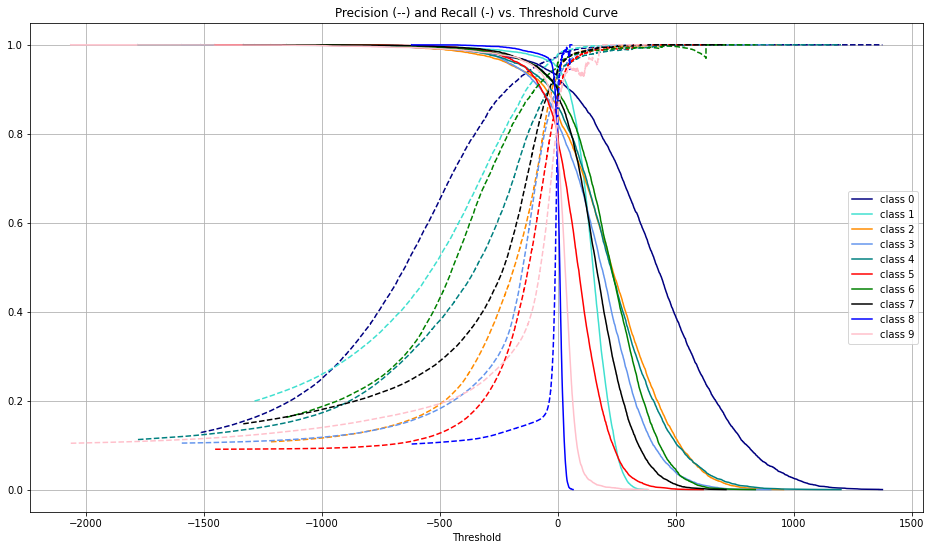

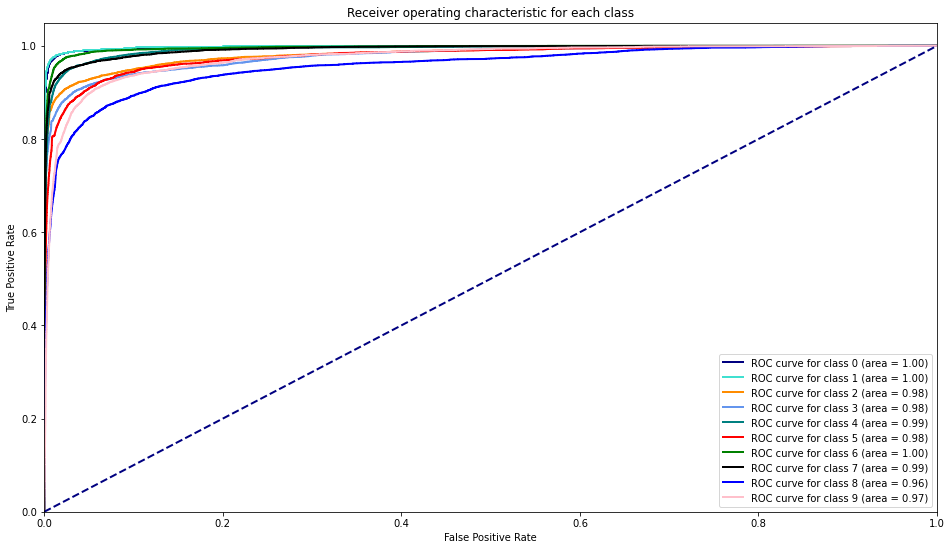

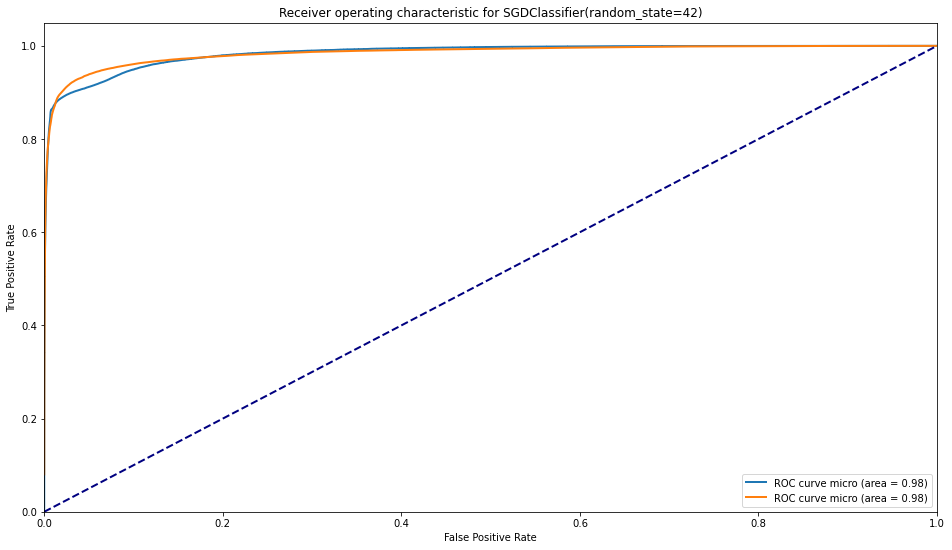

In [14]:
sgd = analyze_classifier(sgd_classifier, X_train_prepared, y_train)
sgd.plot_precision_recall_micro()
sgd.plot_precision_recall_classes()
sgd.plot_precision_recall_vs_threshold()
sgd.plot_roc_classes()
sgd.plot_roc_micro_macro()

###  Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = OneVsRestClassifier(
    make_pipeline(RandomForestClassifier(random_state=42))
)
rf_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(random_state=42))]))

[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


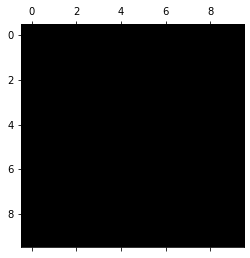

In [16]:
y_train_pred =  rf_classifier.predict(X_train_prepared)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



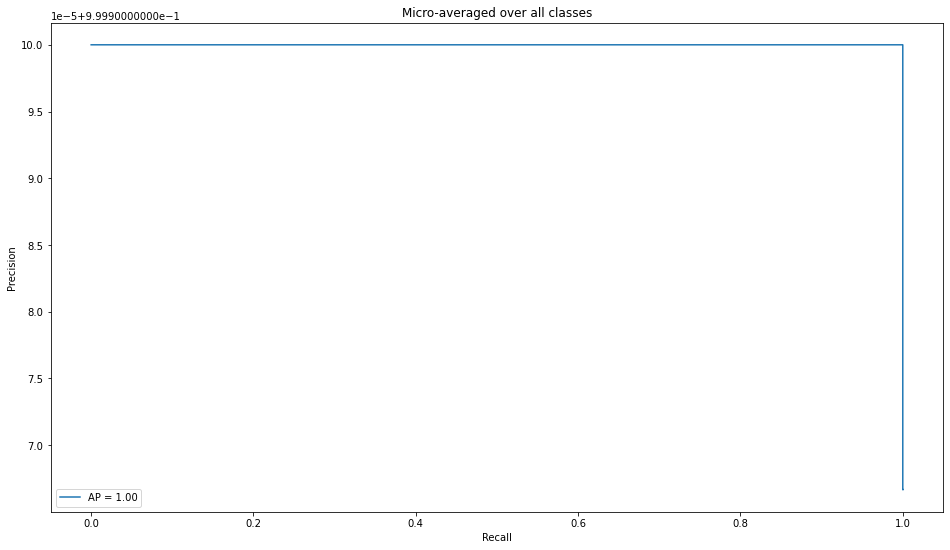

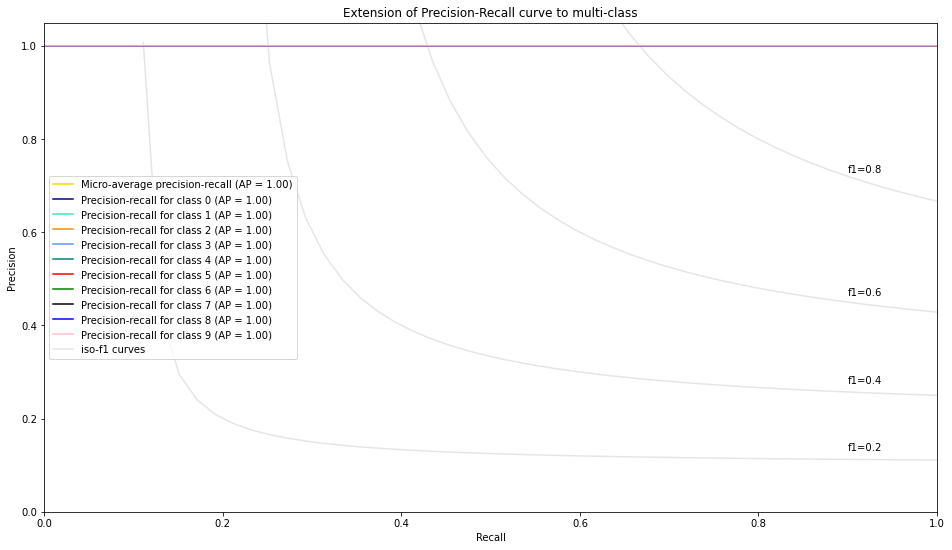

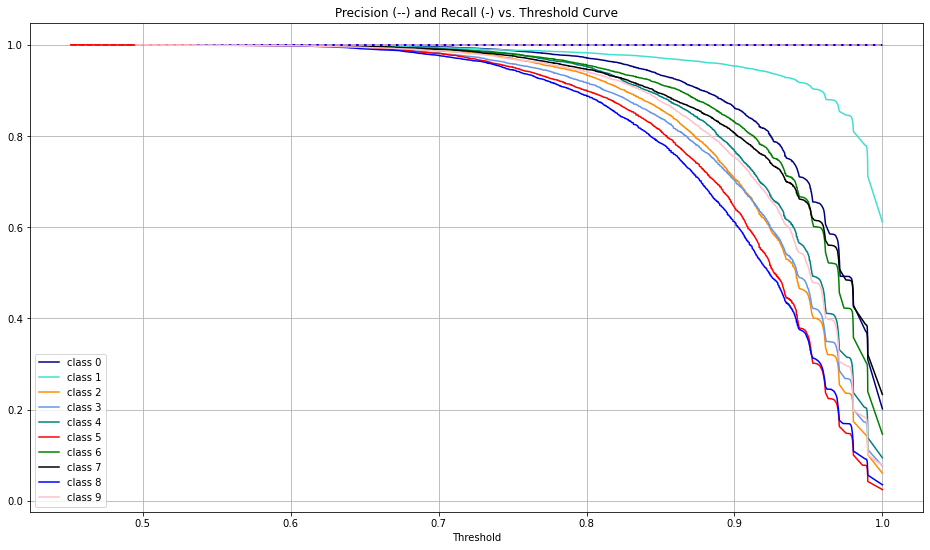

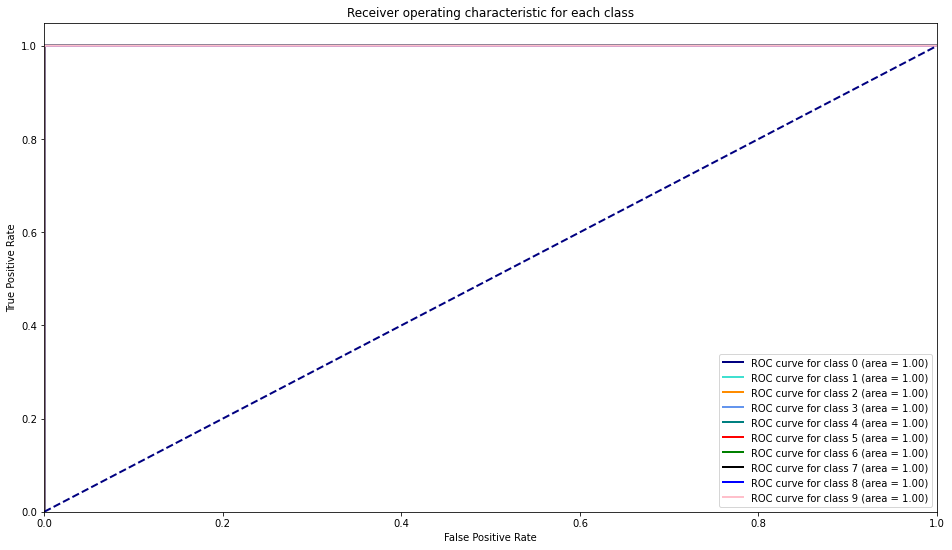

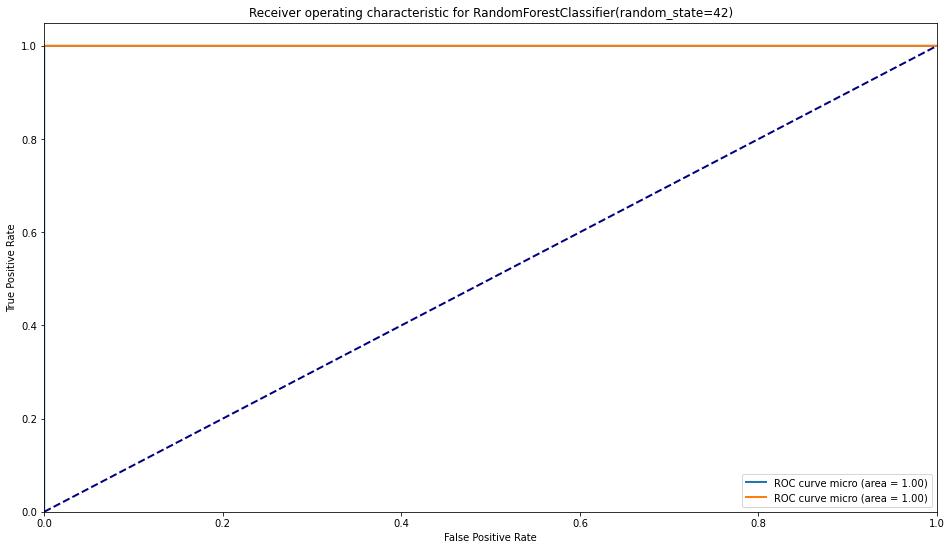

In [18]:
rfc = analyze_classifier(rf_classifier, X_train_prepared, y_train)
rfc.plot_precision_recall_micro()
rfc.plot_precision_recall_classes()
rfc.plot_precision_recall_vs_threshold()
rfc.plot_roc_classes()
rfc.plot_roc_micro_macro()

## Measure and compare their performance.
- For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

### Stochastic Gradient Decent
- [Multilabel PrecisionVsRecall example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

- [Multilabel ROC example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict

sgd_classifier.classes_ = classes
y_train_score = cross_val_predict(sgd_classifier, X_train_prepared, y_train, cv=3, method="decision_function")
y_train_pred = np.argmax(y_train_score, axis=1)

[[5582    0   13    6    8   41   29    5  238    1]
 [   1 6411   41   25    3   41    4    8  196   12]
 [  25   28 5262   87   69   19   61   37  361    9]
 [  23   18  112 5253    0  177   25   41  424   58]
 [  11   13   37   11 5219    7   35   20  329  160]
 [  25   19   34  146   54 4444   75   17  537   70]
 [  28   21   46    2   41   85 5544    5  146    0]
 [  21   14   52   24   51    9    4 5698  189  203]
 [  18   59   41   95    3  127   26    8 5430   44]
 [  21   19   27   57  124   34    1  175  357 5134]]


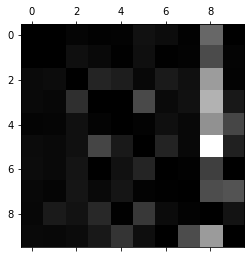

In [20]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [21]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5923
           1       0.97      0.95      0.96      6742
           2       0.93      0.88      0.91      5958
           3       0.92      0.86      0.89      6131
           4       0.94      0.89      0.91      5842
           5       0.89      0.82      0.85      5421
           6       0.96      0.94      0.95      5918
           7       0.95      0.91      0.93      6265
           8       0.66      0.93      0.77      5851
           9       0.90      0.86      0.88      5949

    accuracy                           0.90     60000
   macro avg       0.91      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



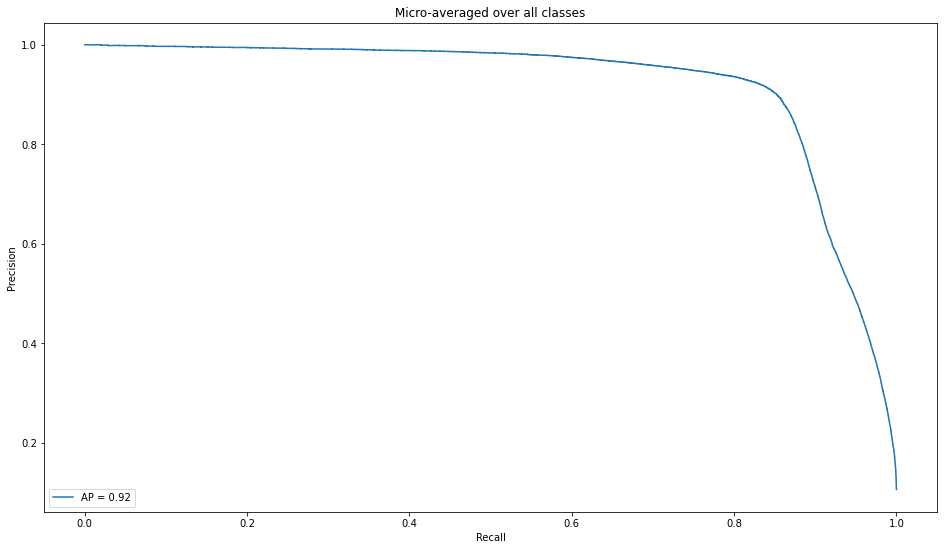

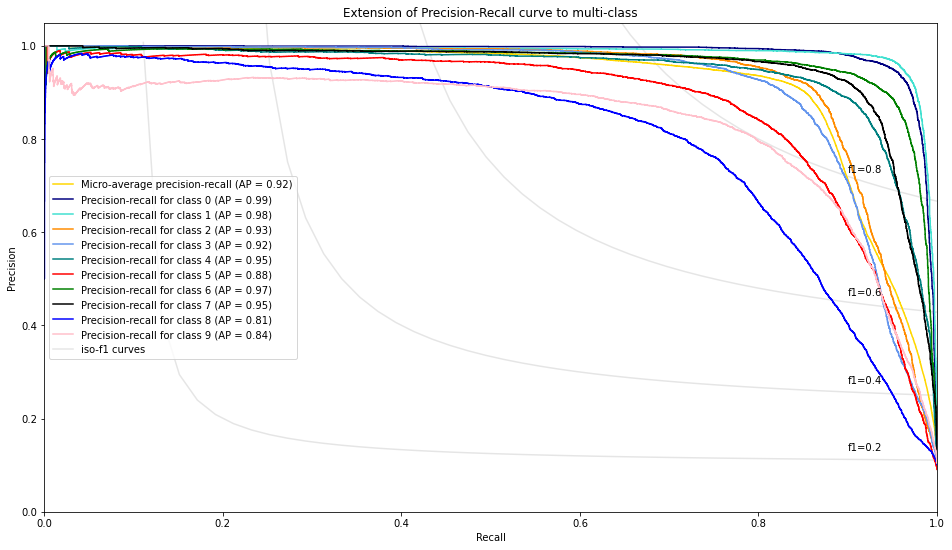

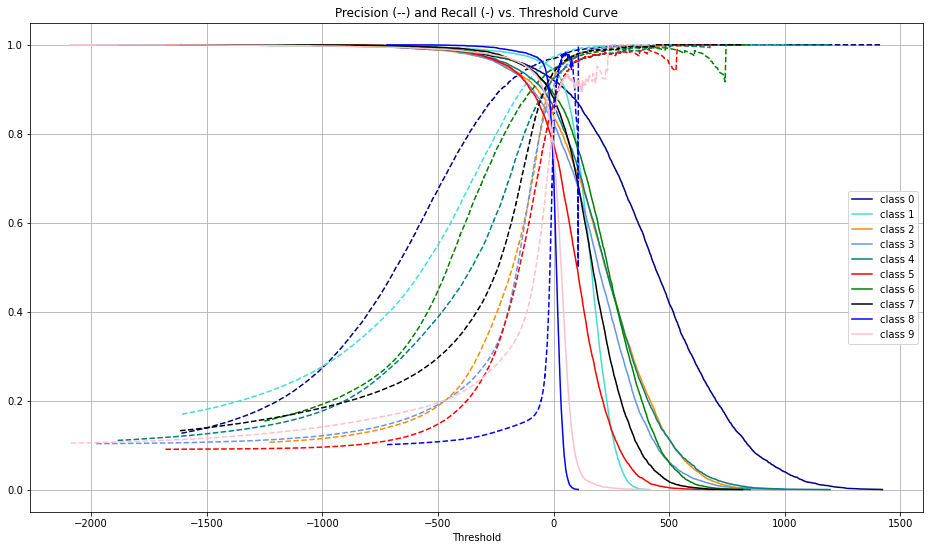

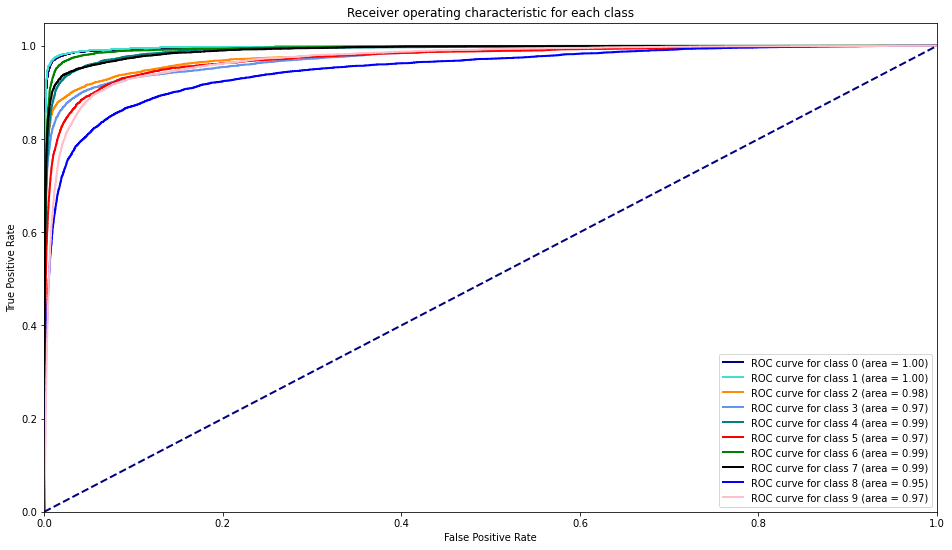

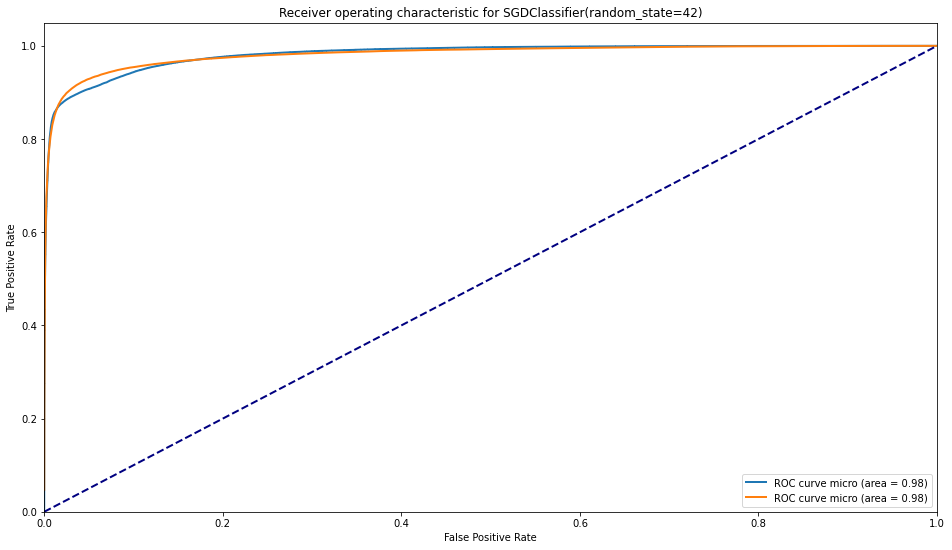

In [22]:
sgd = analyze_classifier(sgd_classifier, X_train_prepared, y_train, y_train_score)
sgd.plot_precision_recall_micro()
sgd.plot_precision_recall_classes()
sgd.plot_precision_recall_vs_threshold()
sgd.plot_roc_classes()
sgd.plot_roc_micro_macro()

### Random Forest

In [23]:
rf_classifier.classes_ = classes
y_train_score = cross_val_predict(rf_classifier, X_train_prepared, y_train, cv=3, method="predict_proba")
y_train_pred = np.argmax(y_train_score, axis=1)

[[5836    1    9    2    5    6   18    1   41    4]
 [   1 6632   43   14   11    0   11   14   11    5]
 [  24    8 5783   31   22    0   13   30   39    8]
 [   6   11   93 5788    5   45   13   58   71   41]
 [   7   15   15    2 5635    0   25    8   16  119]
 [  29    9   11   60   11 5176   63    3   31   28]
 [  26    7    6    0    9   64 5784    0   21    1]
 [   8   23   57    8   32    1    0 6027   14   95]
 [  14   37   39   60   25   39   33    8 5541   55]
 [  21    9   17   79   68   18    2   80   37 5618]]


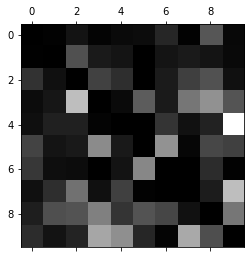

In [24]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.98      0.98      0.98      6742
           2       0.95      0.97      0.96      5958
           3       0.96      0.94      0.95      6131
           4       0.97      0.96      0.97      5842
           5       0.97      0.95      0.96      5421
           6       0.97      0.98      0.97      5918
           7       0.97      0.96      0.96      6265
           8       0.95      0.95      0.95      5851
           9       0.94      0.94      0.94      5949

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000



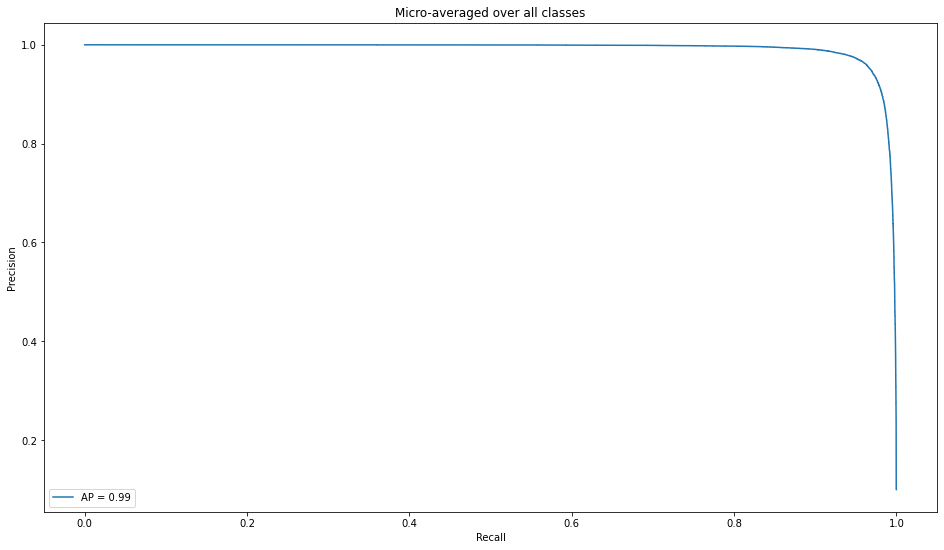

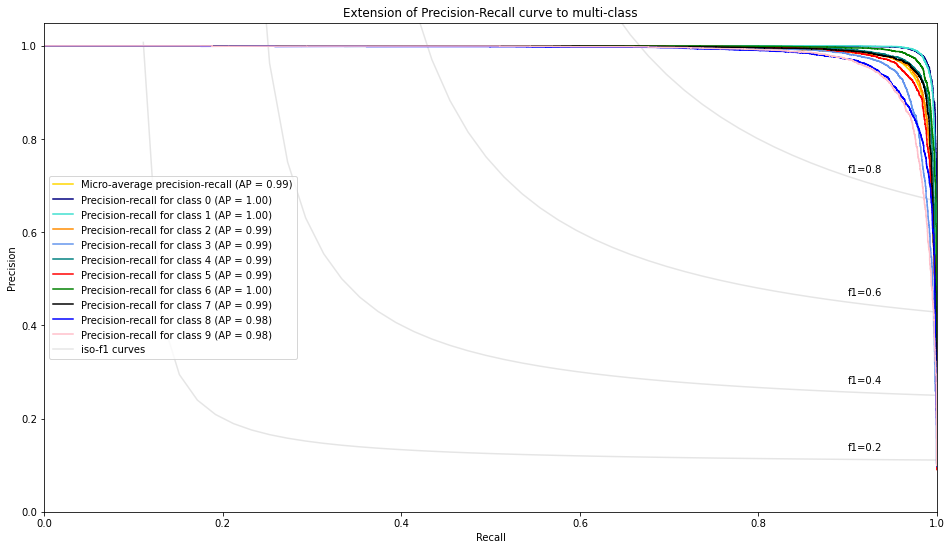

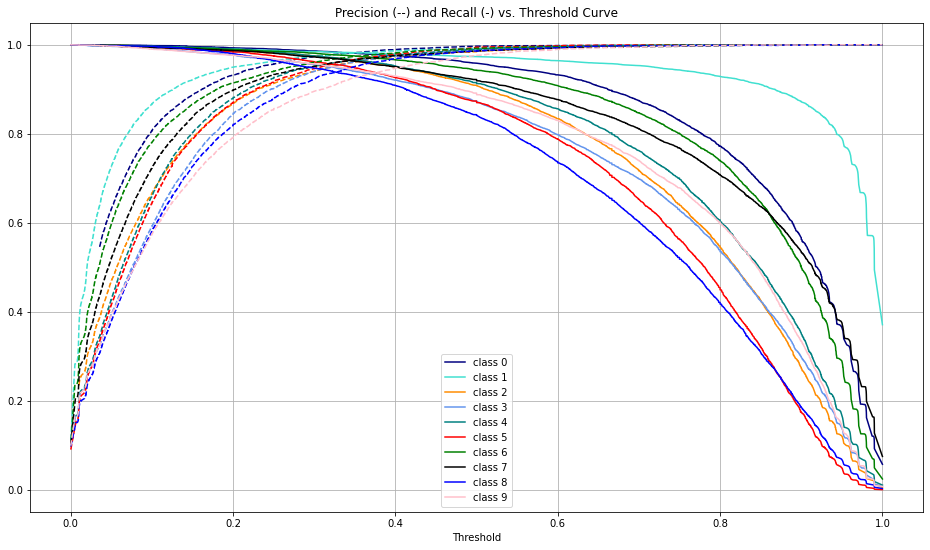

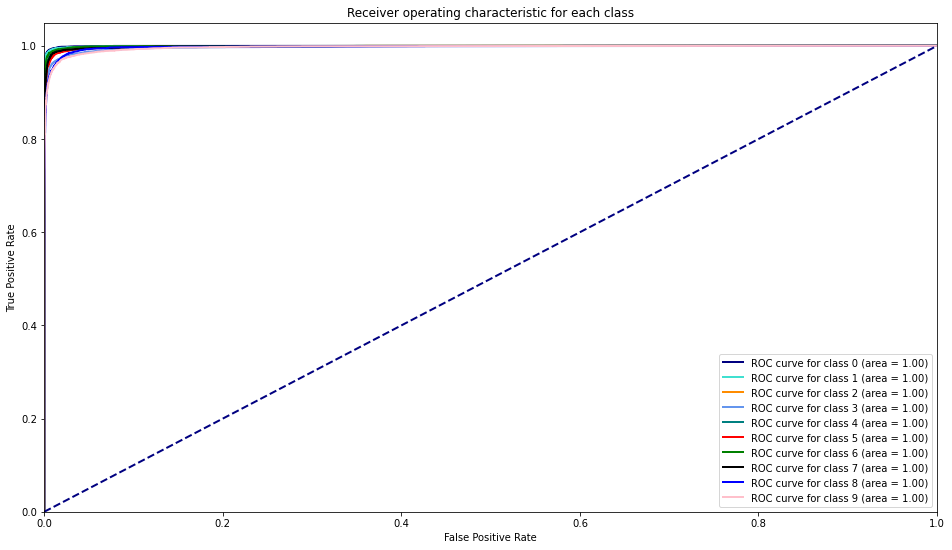

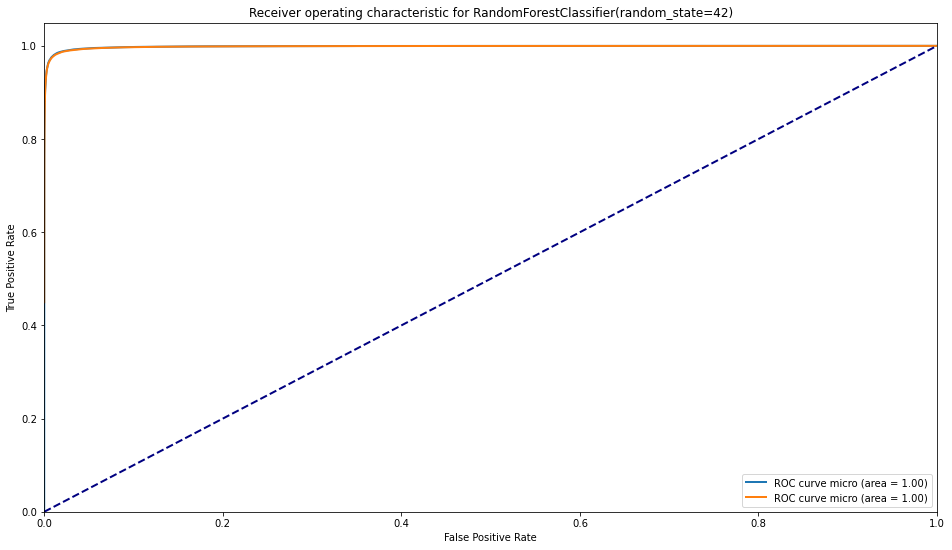

In [26]:
rfc = analyze_classifier(rf_classifier, X_train_prepared, y_train, y_train_score)
rfc.plot_precision_recall_micro()
rfc.plot_precision_recall_classes()
rfc.plot_precision_recall_vs_threshold()
rfc.plot_roc_classes()
rfc.plot_roc_micro_macro()

### Compare ROC curves

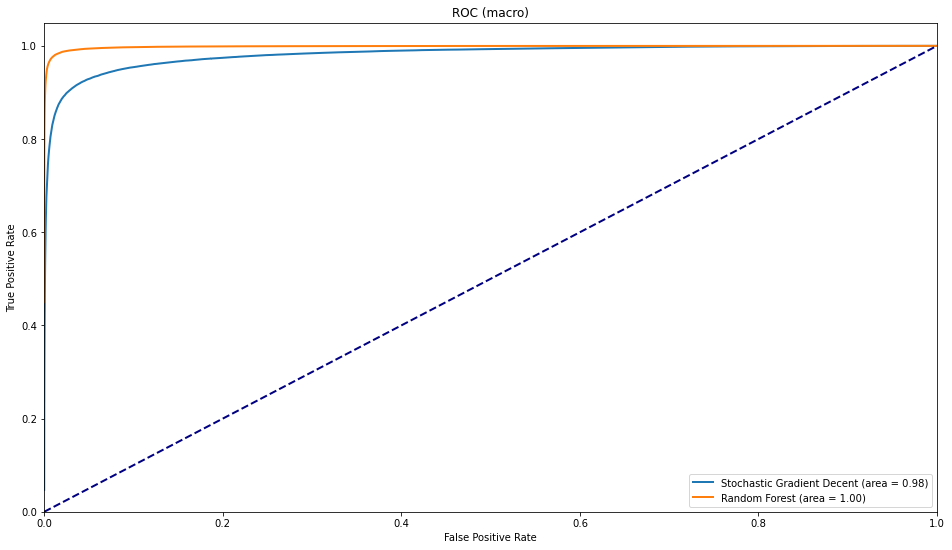

In [27]:
_, ax = plt.subplots(figsize=(16, 9))
lw = 2
ax.plot(
    sgd.fpr['macro'],
    sgd.tpr['macro'],
    lw=lw,
    label=("Stochastic Gradient Decent (area = %0.2f)" % sgd.roc_auc['macro']),
)
ax.plot(
    rfc.fpr['macro'],
    rfc.tpr['macro'],
    lw=lw,
    label=("Random Forest (area = %0.2f)" % rfc.roc_auc['macro']),
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (macro)")
plt.legend(loc="lower right")
plt.show()

## Analyze the most significant variables for each algorithm.

In [28]:
attributes = X.columns.tolist()
def feature_importance(features, attributes):
    for f, a in sorted(zip(features, attributes), reverse=True):
        print(f"{a}\t{f}")

### Stochastic Gradient Decent

In [29]:
sgd_features = sgd_classifier.estimators_[0].named_steps['sgdclassifier'].coef_[0]
feature_importance(sgd_features, attributes)

pixel515	17.322396567196222
pixel487	16.461757238688662
pixel459	14.90392332636139
pixel486	14.348662617992632
pixel514	14.288362790070282
pixel543	13.90865363195117
pixel571	13.499091695079269
pixel431	12.931546174953231
pixel572	12.64855137453845
pixel600	12.41597648999505
pixel458	12.243438982874117
pixel628	12.015386997812191
pixel428	11.704815082885496
pixel485	11.525207374190574
pixel599	11.397125790502239
pixel456	11.20394556006822
pixel457	10.884049822986132
pixel513	9.81554540617262
pixel400	9.801088521848191
pixel629	9.749659006575873
pixel429	9.46924853643552
pixel430	9.371957109695419
pixel656	9.347847058264657
pixel356	9.266117433749079
pixel271	9.239672800781017
pixel242	9.220140604769092
pixel627	9.201766424564761
pixel484	9.166951287043153
pixel384	9.155015050431418
pixel630	9.014808820123223
pixel657	8.854192884255802
pixel414	8.720948751053003
pixel570	8.586462768834737
pixel357	8.518458337668486
pixel403	8.46970377604343
pixel386	8.390520233467717
pixel243	8.36674865

### Random Forest

In [30]:
rf_features = rf_classifier.estimators_[0].named_steps['randomforestclassifier'].feature_importances_
feature_importance(rf_features, attributes)

pixel436	0.024355849061604384
pixel409	0.023118386632614927
pixel381	0.023044646956959403
pixel434	0.022580099242104315
pixel387	0.02241995228750058
pixel408	0.02093175417886717
pixel435	0.020450731528225553
pixel463	0.01916007724183473
pixel386	0.017561665938464276
pixel415	0.01604074086958626
pixel332	0.015512684255816001
pixel358	0.014923572383603938
pixel360	0.014515019462169916
pixel462	0.013585140611948652
pixel331	0.01344814134359014
pixel410	0.012766429935193084
pixel437	0.01259574956760083
pixel330	0.012287854555975015
pixel491	0.011799347653259329
pixel382	0.011325055836207172
pixel388	0.010996846032581503
pixel443	0.01089701163030786
pixel359	0.010819205067614397
pixel512	0.010698070875327235
pixel407	0.010689409971365069
pixel455	0.010064647890767464
pixel380	0.009940595377362207
pixel483	0.009224411651752931
pixel484	0.008979738578340698
pixel383	0.008610837499177711
pixel540	0.008284212511792663
pixel490	0.0077531949720129585
pixel433	0.007583633565339005
pixel461	0.00741

pixel390	5.901315753054026e-05
pixel341	5.816908746490098e-05
pixel202	5.777575768175198e-05
pixel106	5.60135377360926e-05
pixel135	5.521045042832881e-05
pixel529	5.413584014608338e-05
pixel258	5.288723076669442e-05
pixel95	5.1982160323654734e-05
pixel678	5.15931059593023e-05
pixel592	5.1280186428007584e-05
pixel277	5.067153663164901e-05
pixel285	4.9571162012134445e-05
pixel722	4.9386795416194246e-05
pixel480	4.931750493222061e-05
pixel679	4.740691461401953e-05
pixel745	4.6991753335099195e-05
pixel136	4.56982953520326e-05
pixel584	4.403881009000866e-05
pixel362	4.395448300557793e-05
pixel643	4.367477106457475e-05
pixel719	4.221910563057321e-05
pixel585	4.124329558830754e-05
pixel649	4.1026644039123617e-05
pixel137	3.95532557949905e-05
pixel707	3.954835872358802e-05
pixel74	3.954377977282471e-05
pixel612	3.852353016859492e-05
pixel474	3.497156974215296e-05
pixel69	3.445571633381988e-05
pixel201	3.337601529990221e-05
pixel446	3.326426677735227e-05
pixel746	3.310974004724012e-05
pixel720	

## Analyze the types of errors the models make.
- What data would a human have used to avoid these errors?

## Perform a quick round of feature selection and engineering.

## Perform one or two more quick iterations of the five previous steps.

## Shortlist the top three to five most promising models, preferring models that make different types of errors.

# Fine-Tune the System
- You will want to use as much data as possible for this step, especially as you move towards the end of fine-tuning.
- As always automate what you can.

## Fine-tune the hyperparameters using cross-validation.
- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
- Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors).

In [31]:
rf_classifier.estimator[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

param_grid = [
    {'estimator__randomforestclassifier__n_estimators': [3, 10], 'estimator__randomforestclassifier__max_features': [2]},
    {'estimator__randomforestclassifier__bootstrap': [False], 'estimator__randomforestclassifier__n_estimators': [3, 10], 'estimator__randomforestclassifier__max_features': [2, 3, 4]}
]
scores = ['accuracy',
           'precision_macro',
           'recall_macro',
           'f1_macro',
           'precision_micro',
           'recall_micro',
           'f1_micro',
           'f1_weighted']

grid_search_models = {}
for score in scores:
    grid_search = GridSearchCV(
        rf_classifier, param_grid=param_grid, cv=2, scoring=score, refit=True
    )
    grid_search.fit(X_train_prepared, y_train)
    grid_search_models[score] = grid_search

In [33]:
for key in grid_search_models.keys():
    print(f'-----------{key}-----------')
    print('best score: ', grid_search_models[key].best_score_)
    print('best parameters: ', grid_search_models[key].best_params_)
    print('best model: ', grid_search_models[key].best_estimator_)
    cv_res = grid_search_models[key].cv_results_
    print('cross validation results')
    for mean_score, std_score, param in zip(cv_res["mean_test_score"], cv_res["std_test_score"], cv_res["params"]):
        print(mean_score, std_score, param)

-----------accuracy-----------
best score:  0.9319500000000001
best parameters:  {'estimator__randomforestclassifier__bootstrap': False, 'estimator__randomforestclassifier__max_features': 4, 'estimator__randomforestclassifier__n_estimators': 10}
best model:  OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(bootstrap=False,
                                                                      max_features=4,
                                                                      n_estimators=10,
                                                                      random_state=42))]))
cross validation results
0.8034333333333333 0.0007666666666666933 {'estimator__randomforestclassifier__max_features': 2, 'estimator__randomforestclassifier__n_estimators': 3}
0.91305 0.00018333333333331314 {'estimator__randomforestclassifier__max_features': 2, 'estimator__randomforestclassifier__n_estimators': 10}
0

## Try Ensemble methods. Combining your best models will often produce better performance than running them individually.

## Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
- Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.

-----------accuracy-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


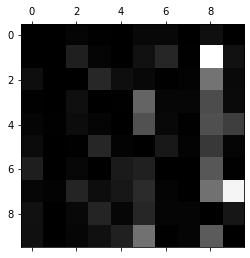

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



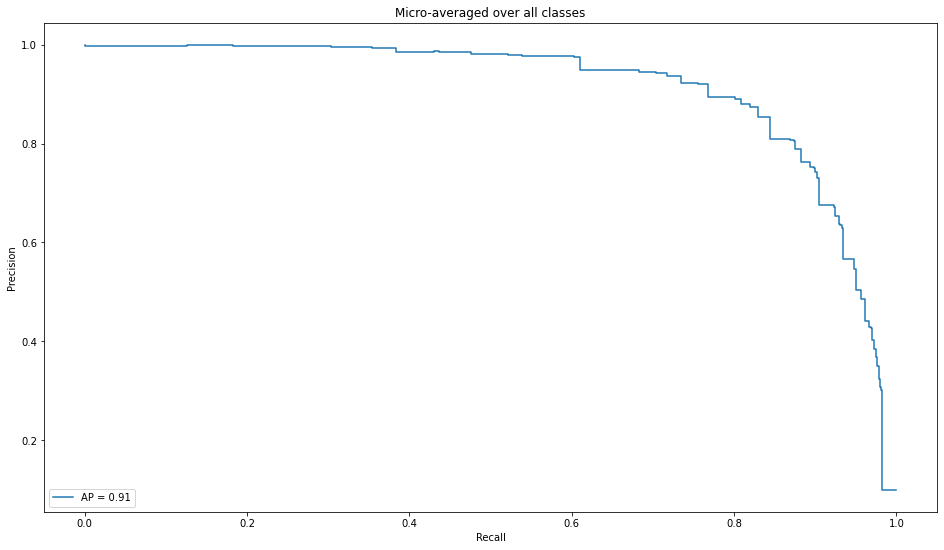

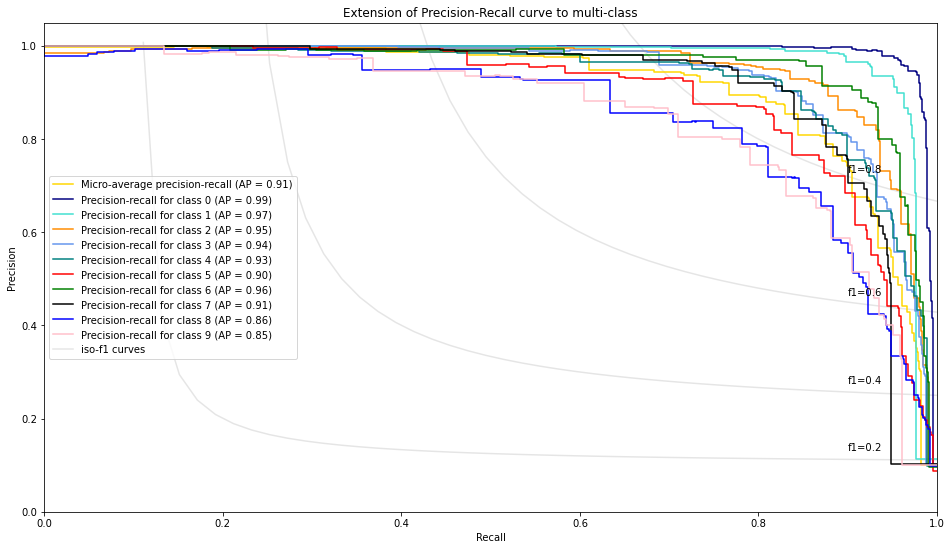

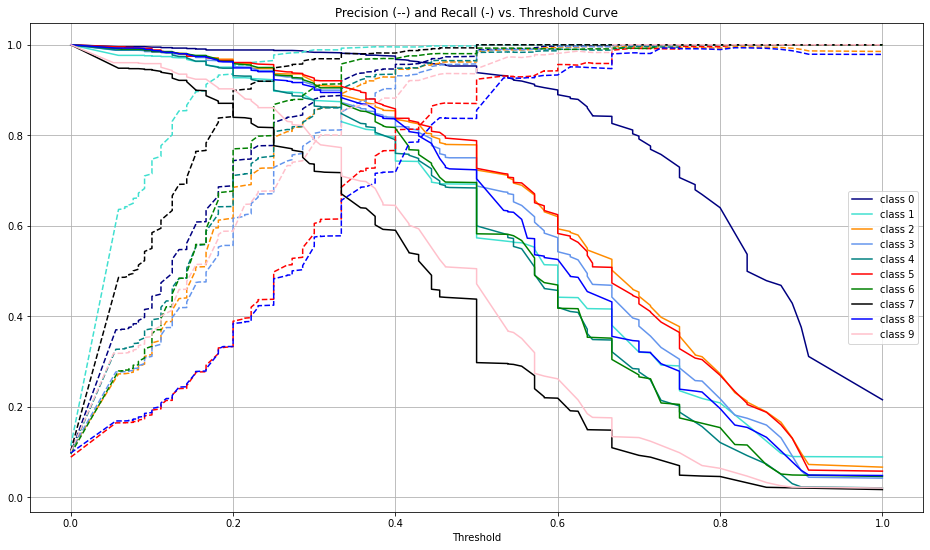

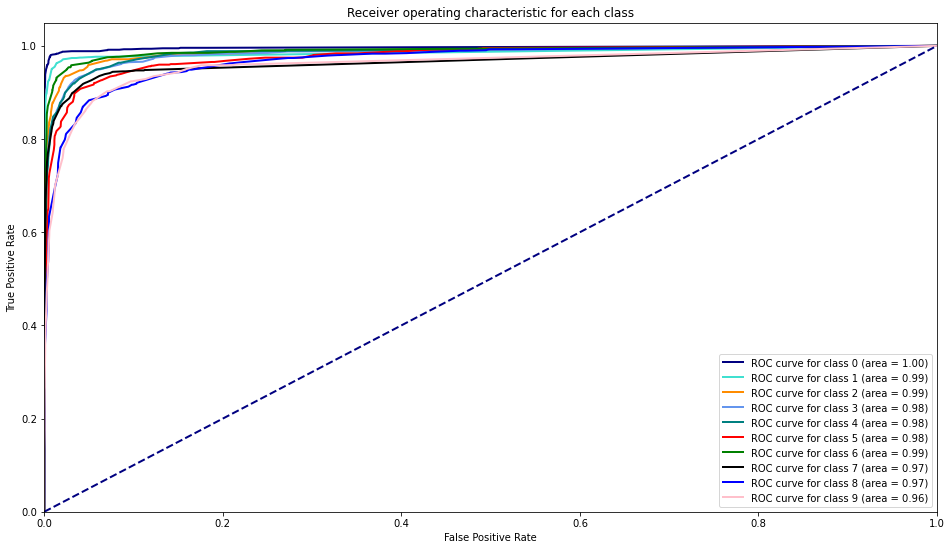

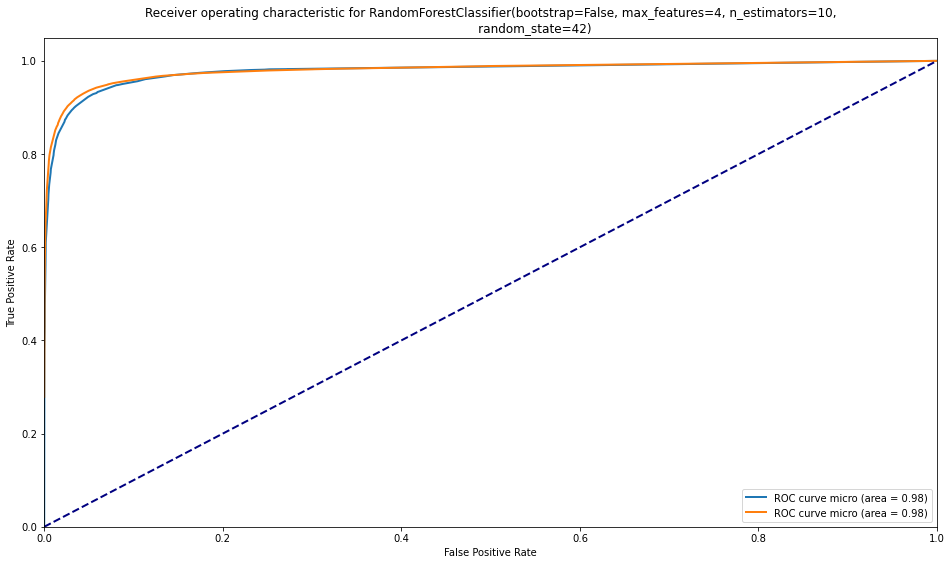

-----------precision_macro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


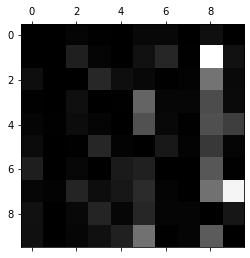

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



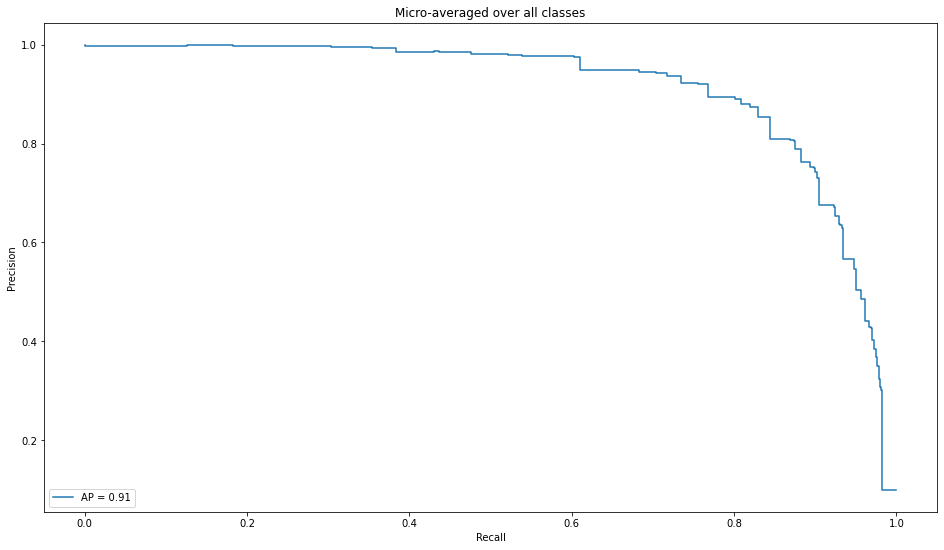

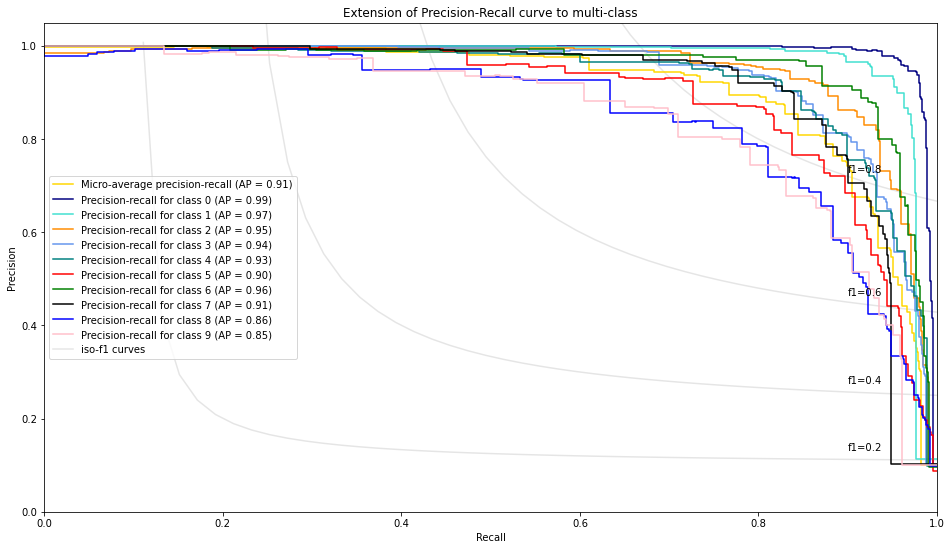

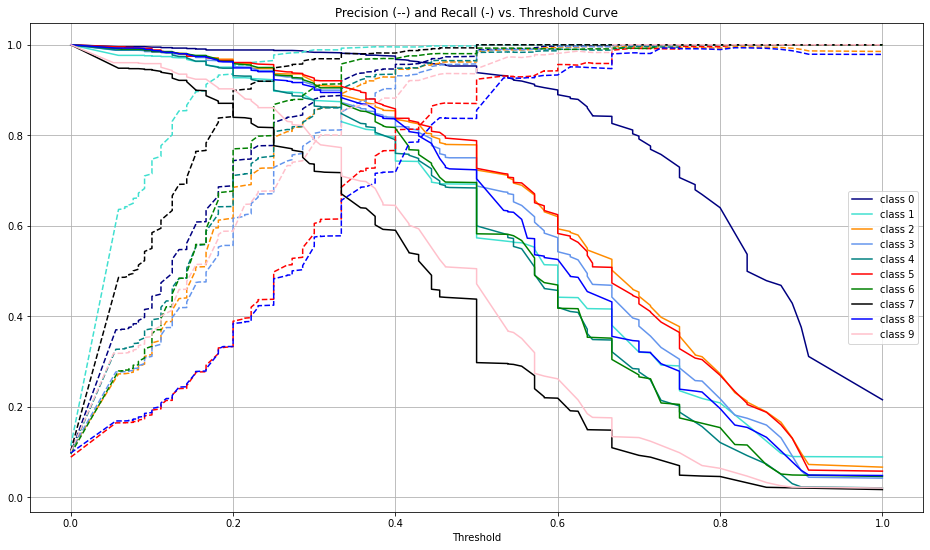

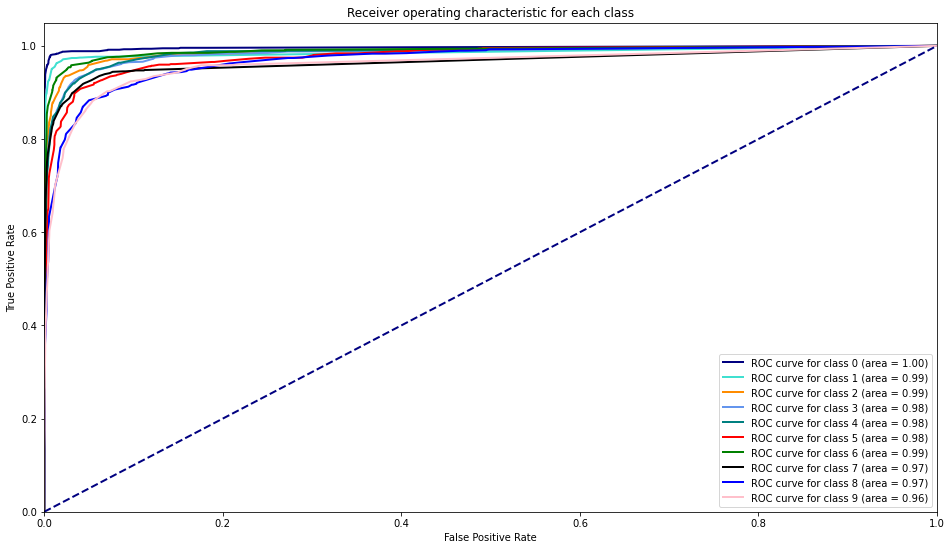

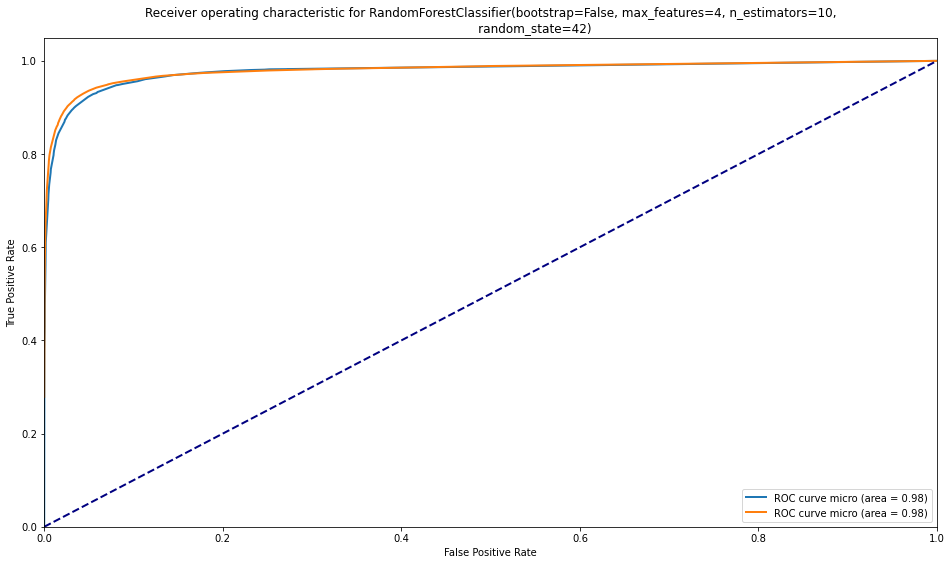

-----------recall_macro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


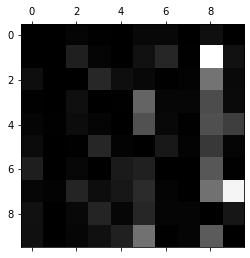

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



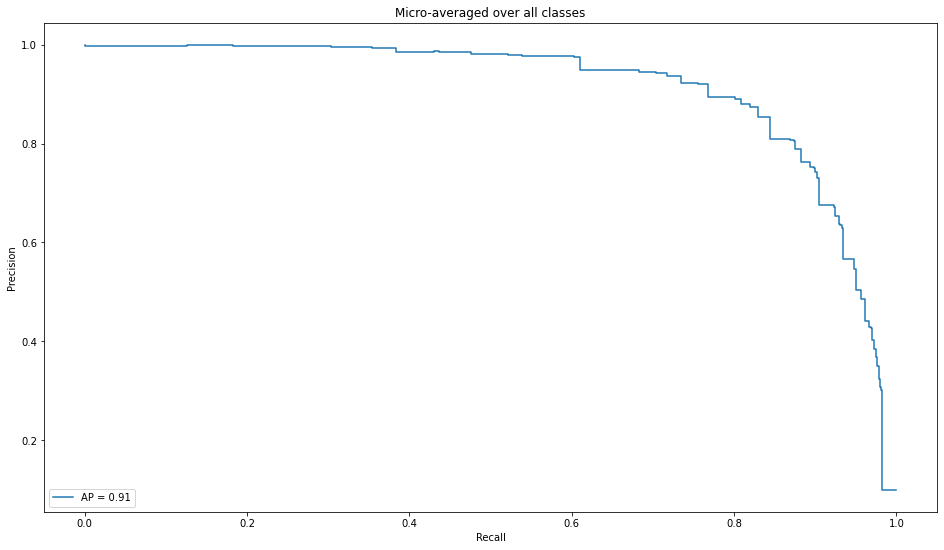

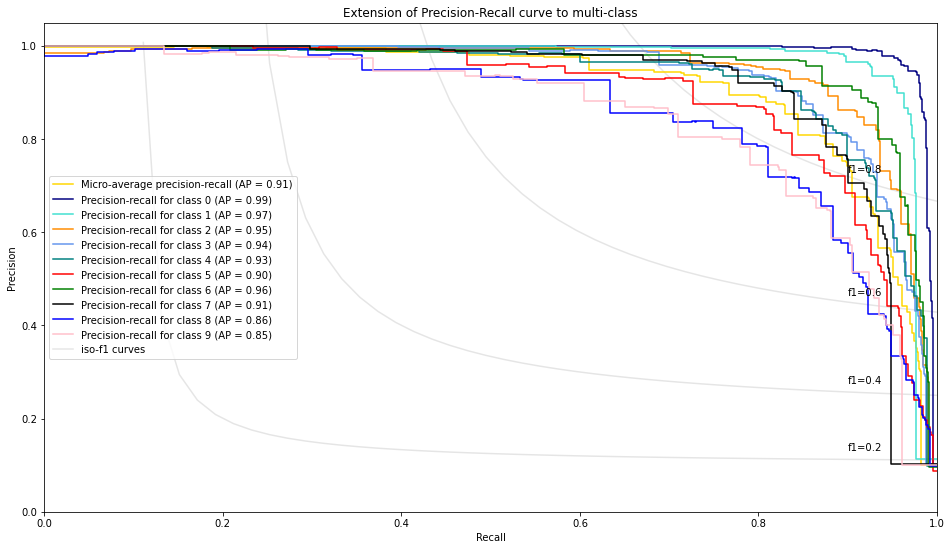

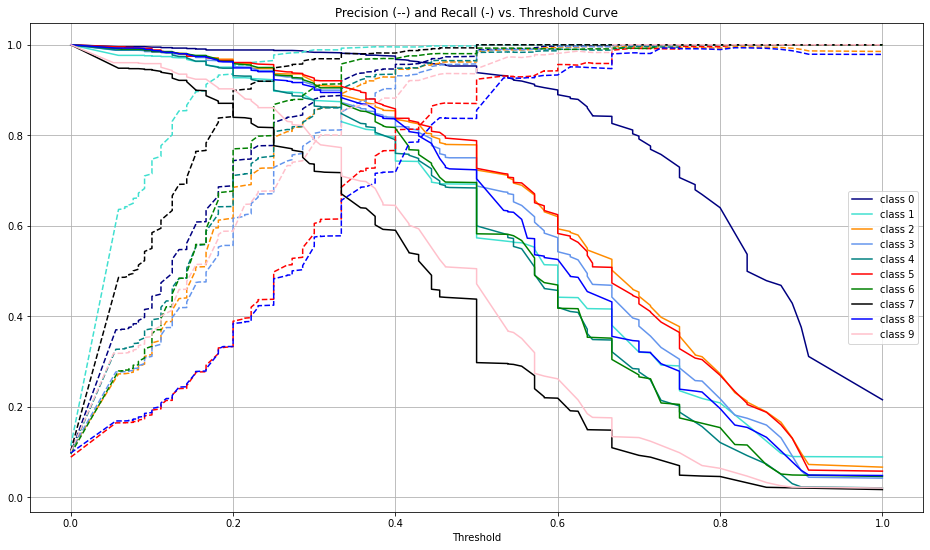

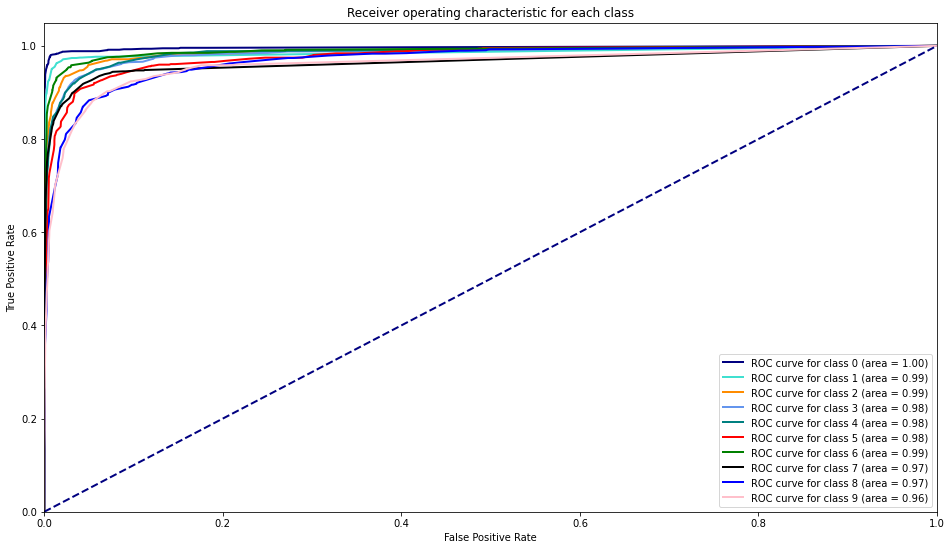

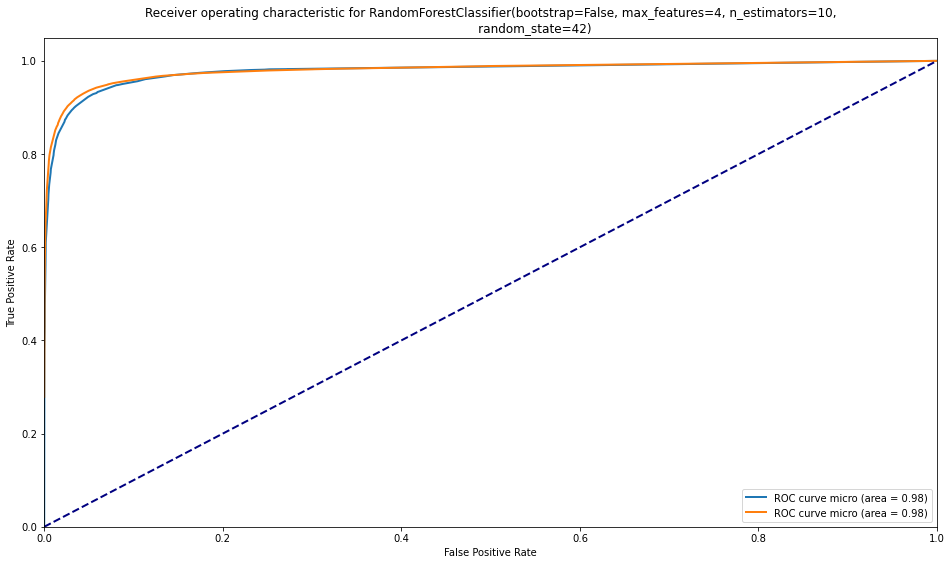

-----------f1_macro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


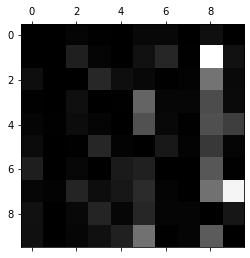

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



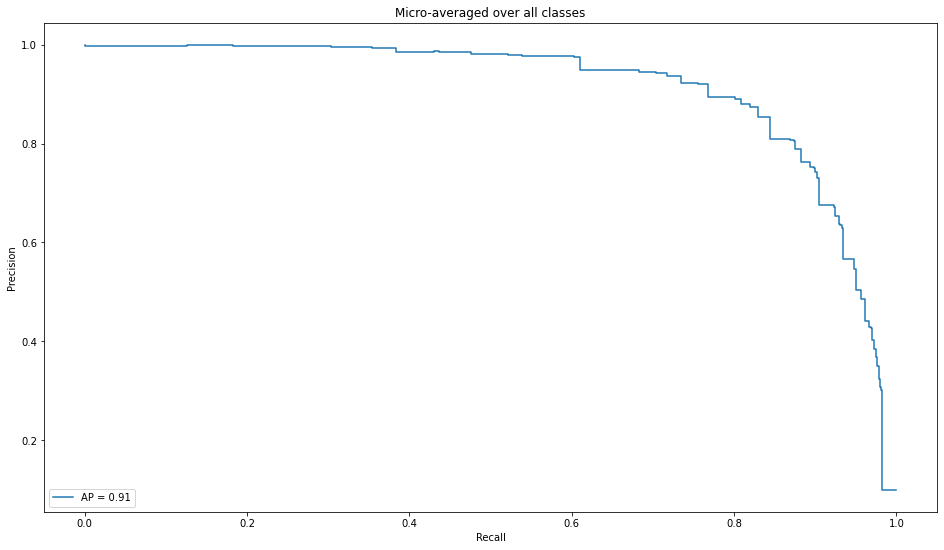

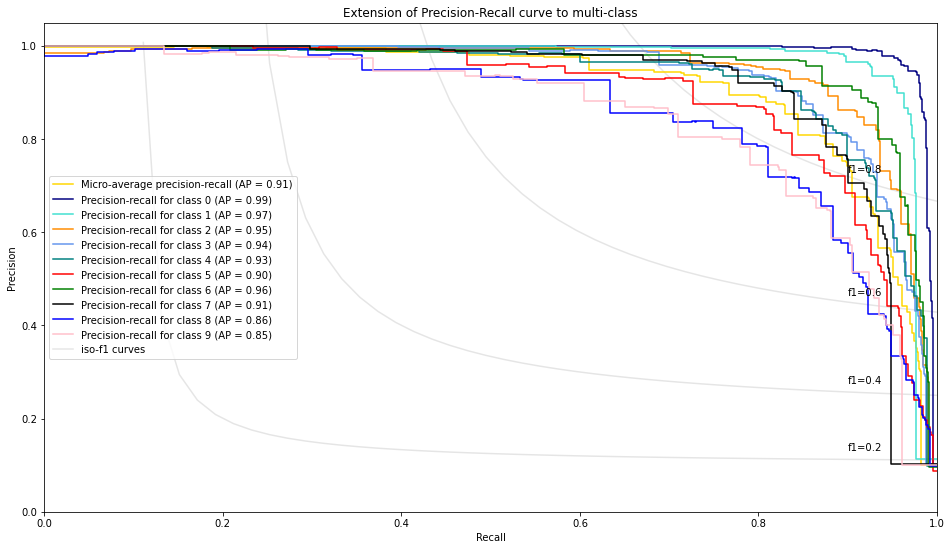

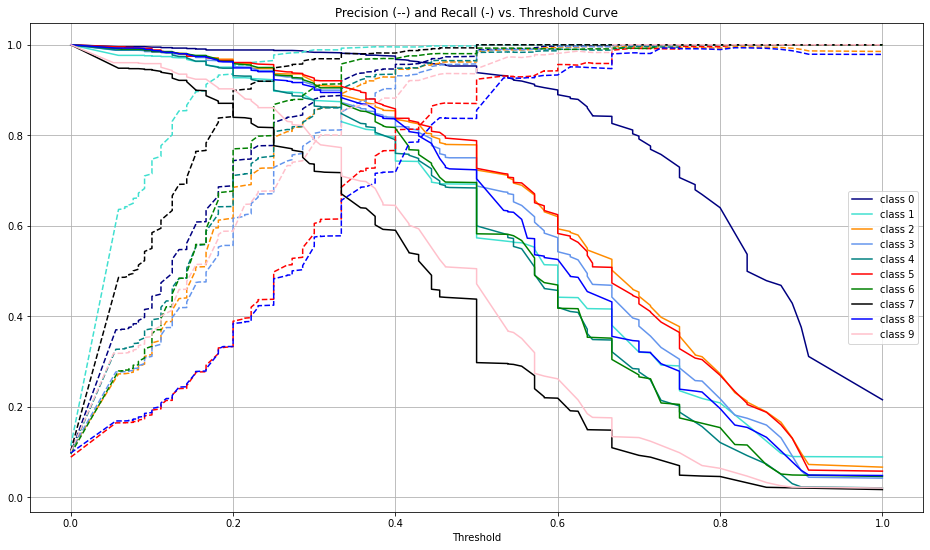

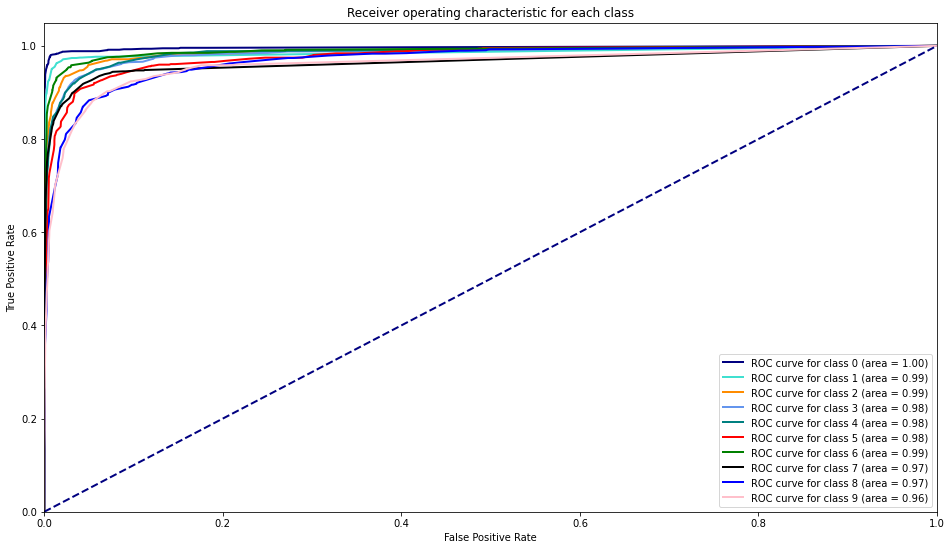

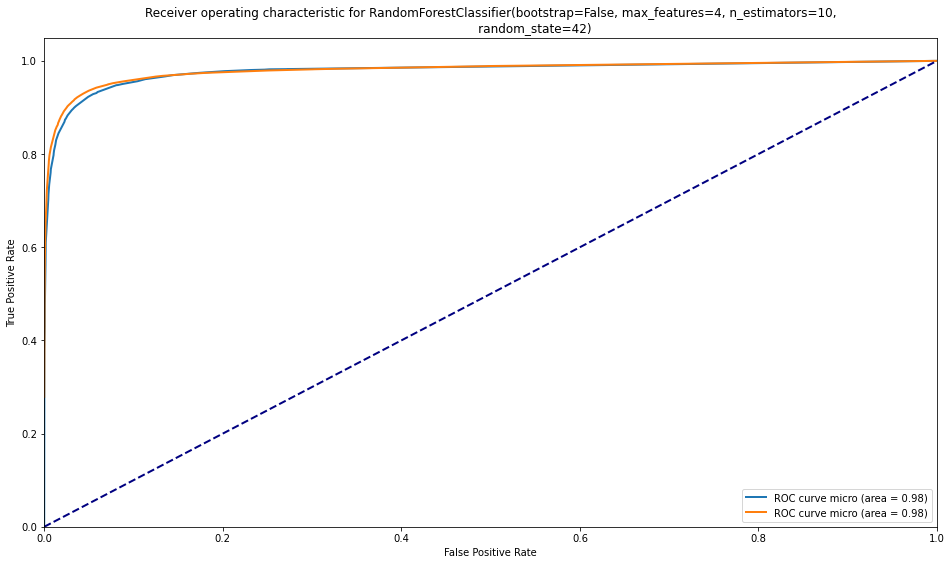

-----------precision_micro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


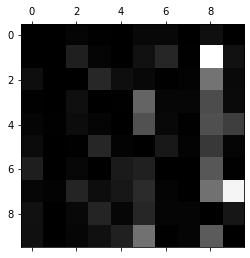

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



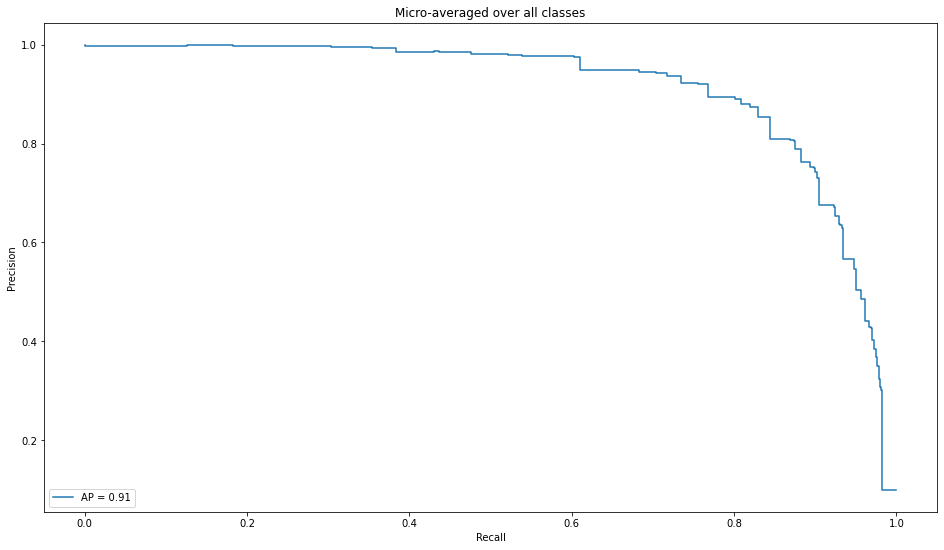

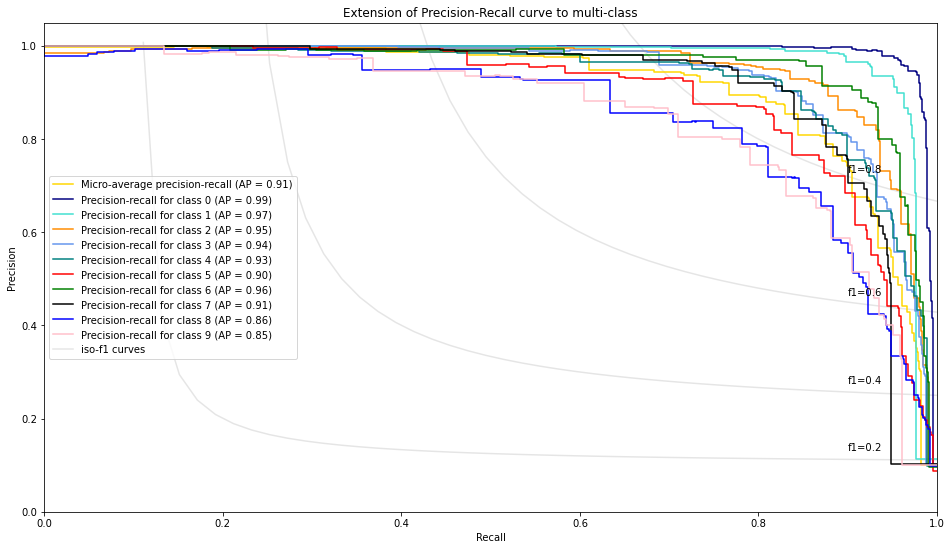

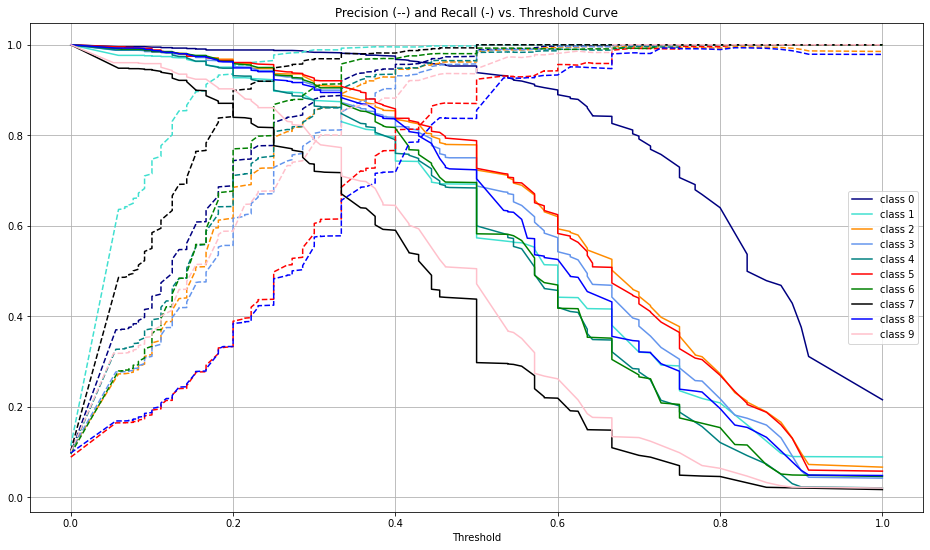

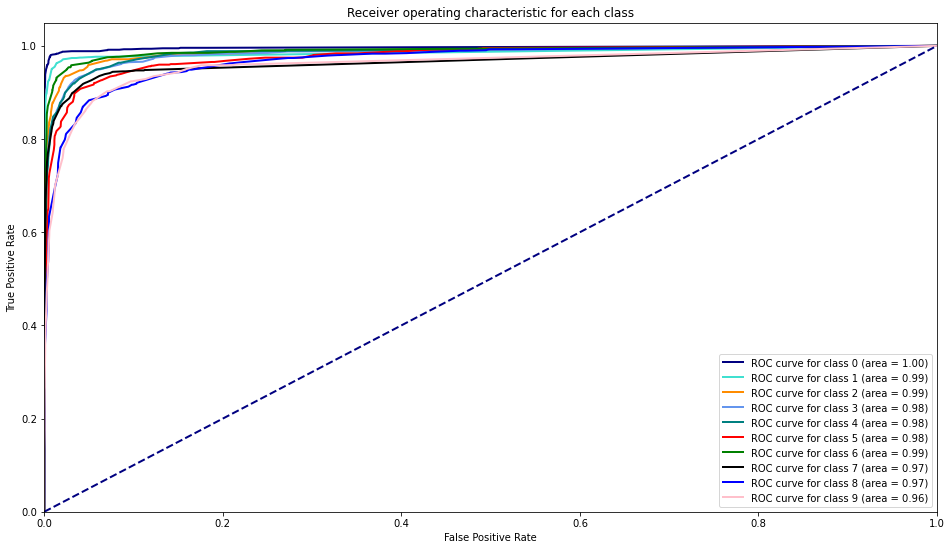

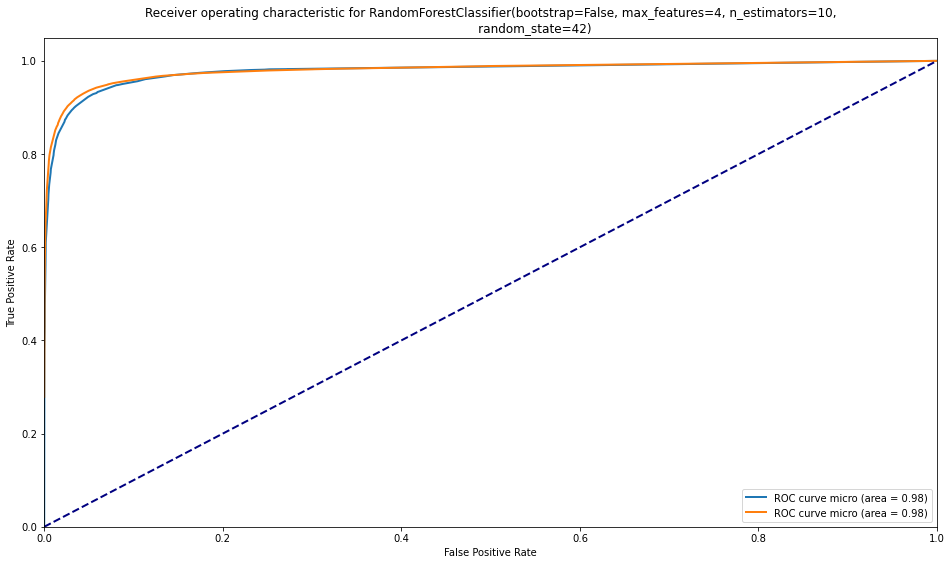

-----------recall_micro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


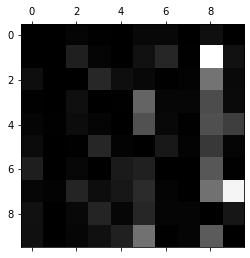

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



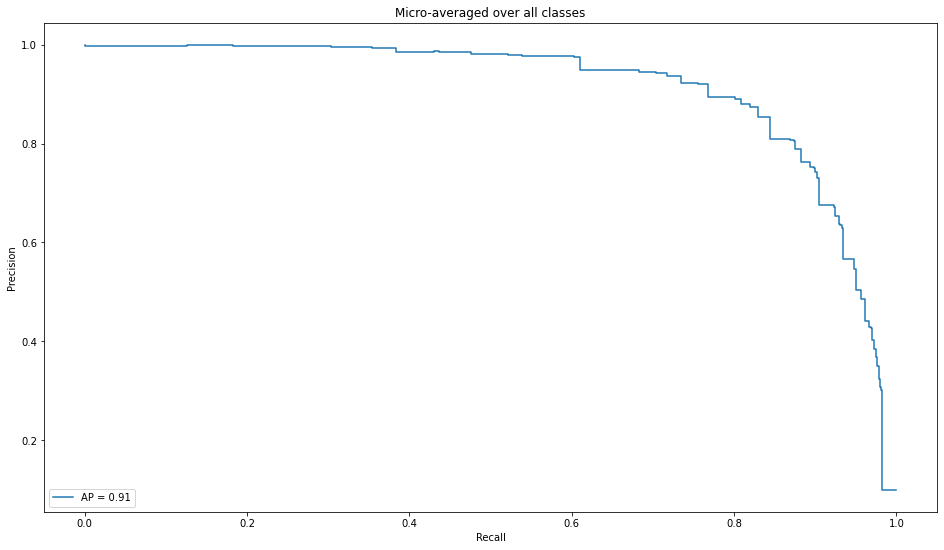

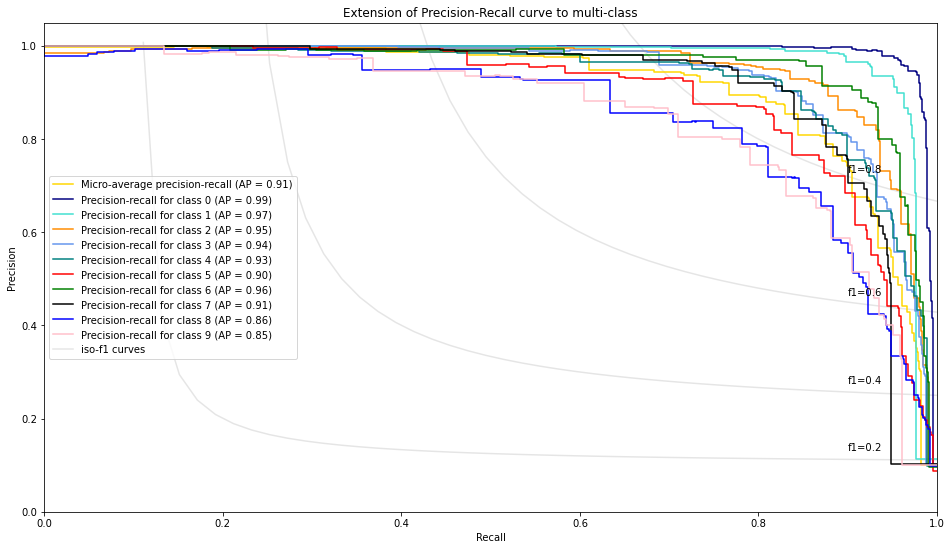

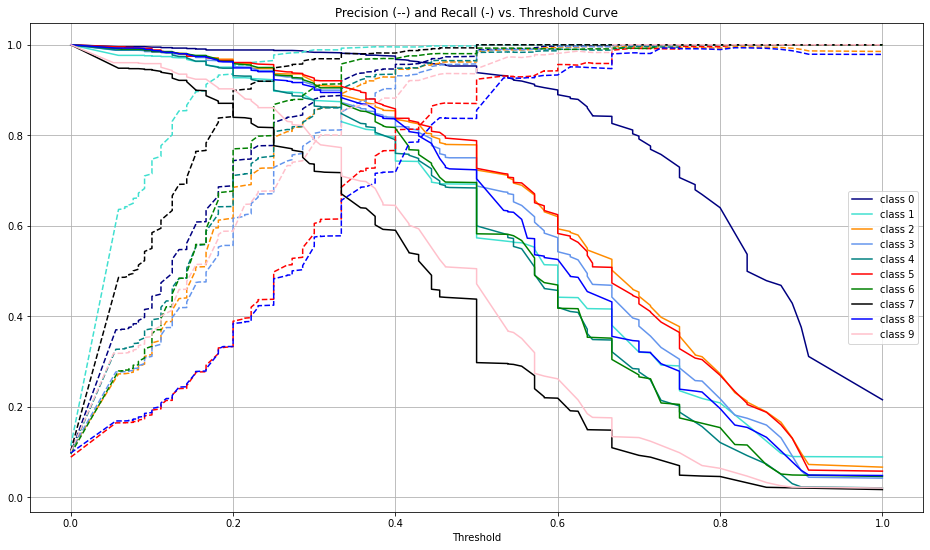

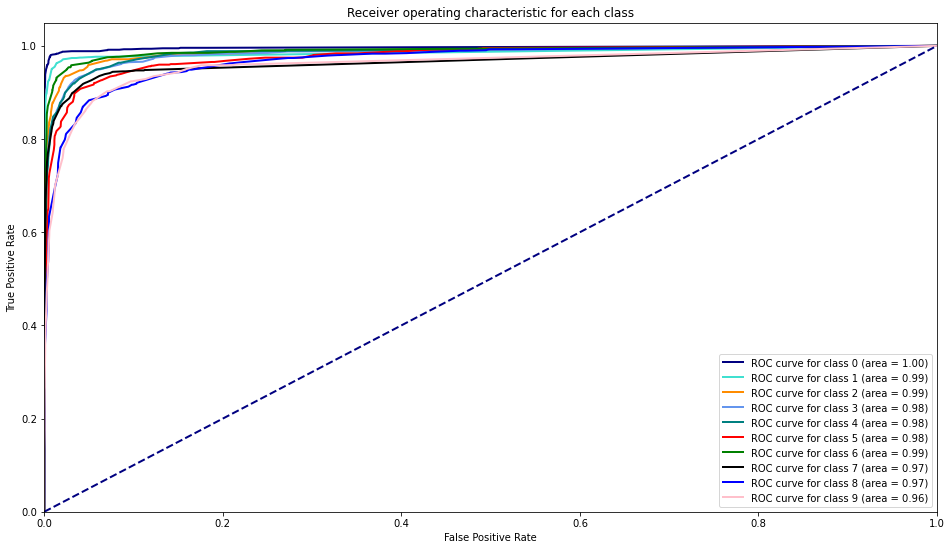

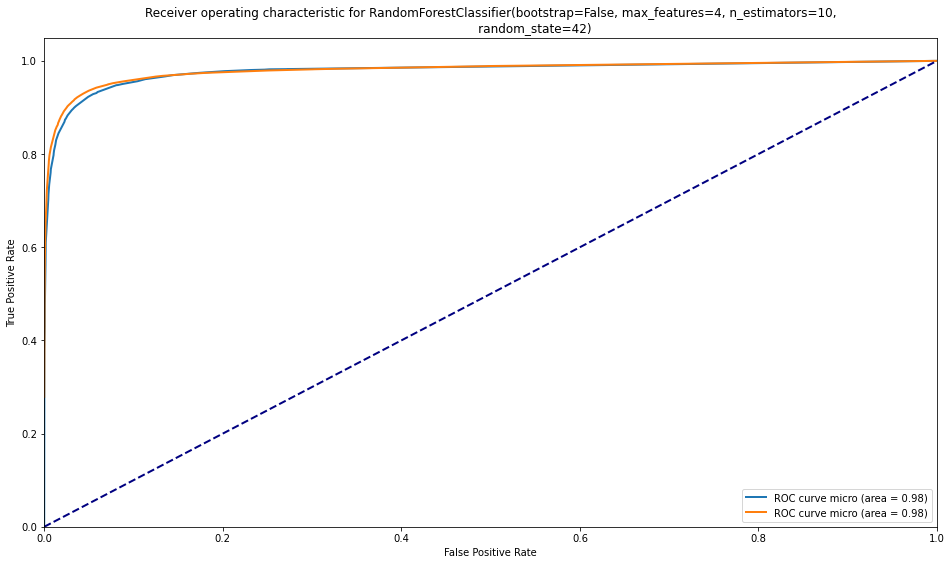

-----------f1_micro-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


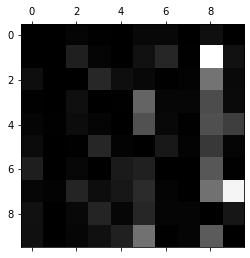

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



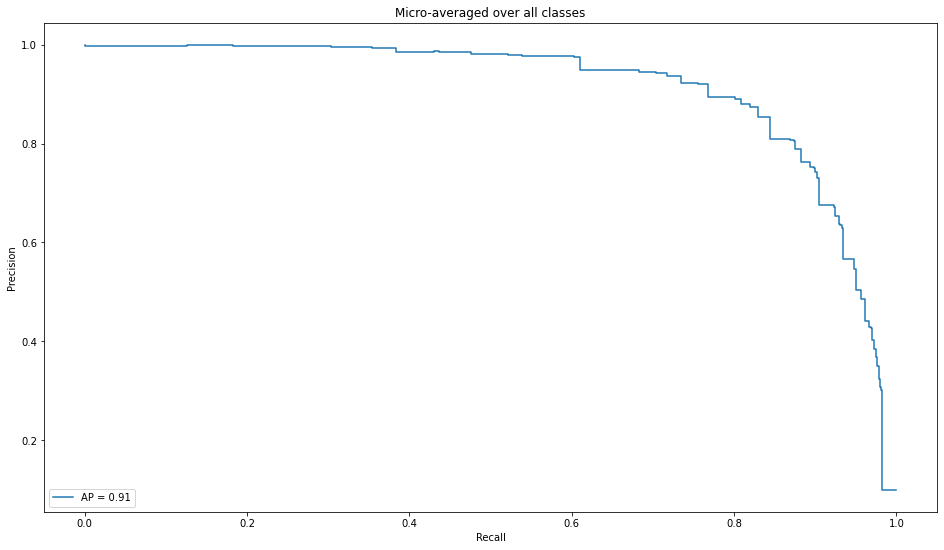

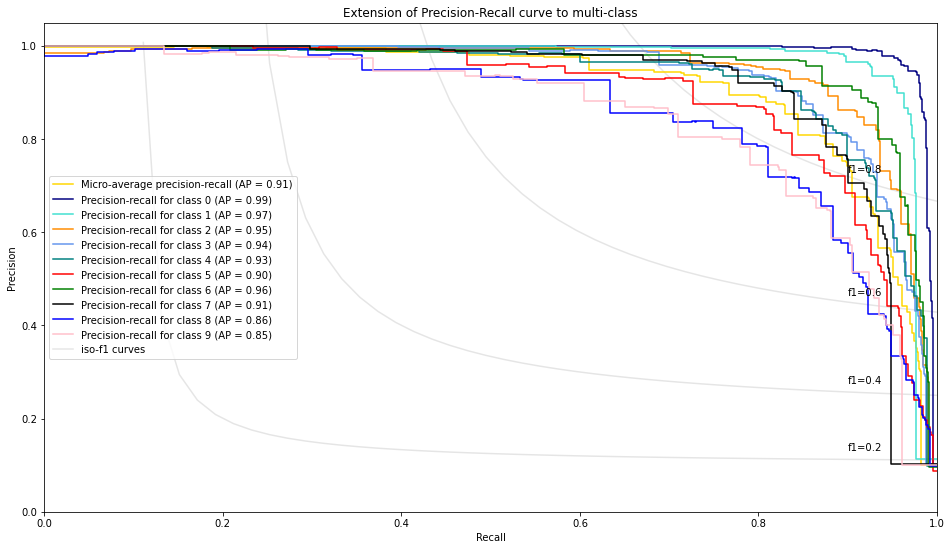

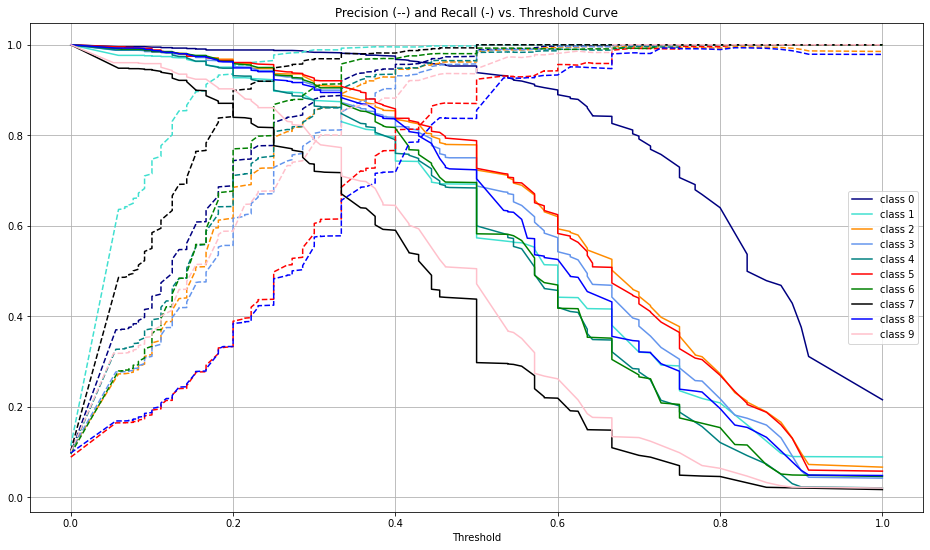

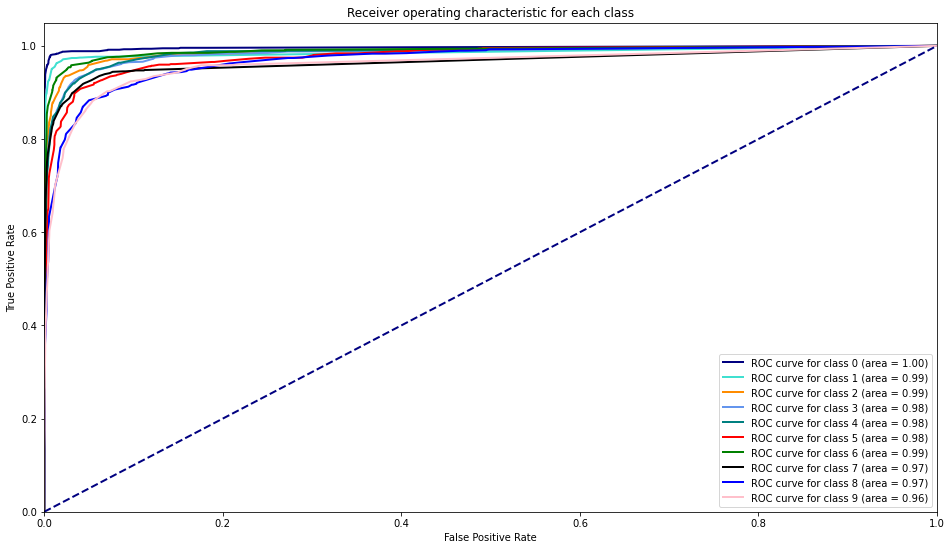

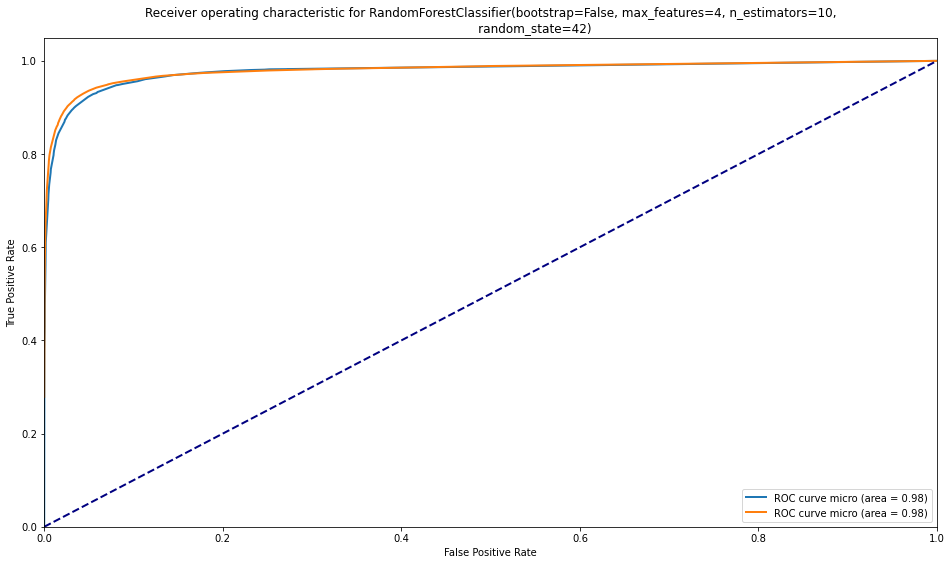

-----------f1_weighted-----------
[[938   0   3   1   0   5   5   0   9   0]
 [  0 866  21   4   0  12  26   1 171  12]
 [  9   0 882  24   9   5   1   2  70   6]
 [  1   0   9 866   1  60   4   4  46   6]
 [  3   1   7   3 817  48   5   1  46  36]
 [  6   0   1  20   2 791  13   2  30   3]
 [ 17   0   4   0  15  19 831   0  49   1]
 [  4   2  22   8  14  26   3 709  69 148]
 [ 10   0   5  21   4  22   3   3 878  13]
 [ 10   0   4  10  20  67   1   3  54 817]]


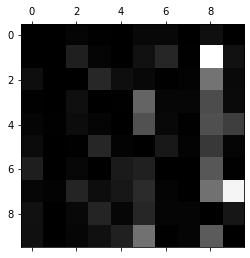

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       961
           1       1.00      0.78      0.87      1113
           2       0.92      0.88      0.90      1008
           3       0.90      0.87      0.89       997
           4       0.93      0.84      0.88       967
           5       0.75      0.91      0.82       868
           6       0.93      0.89      0.91       936
           7       0.98      0.71      0.82      1005
           8       0.62      0.92      0.74       959
           9       0.78      0.83      0.81       986

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



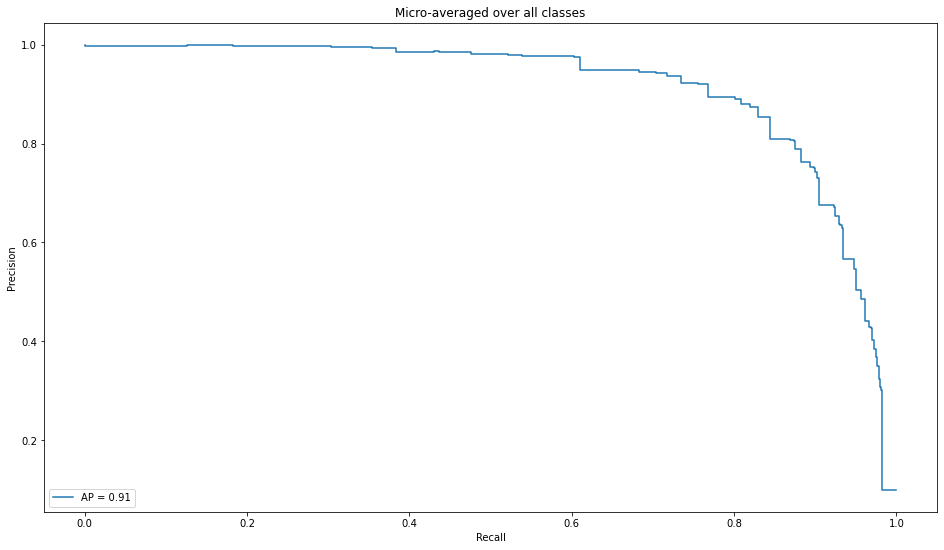

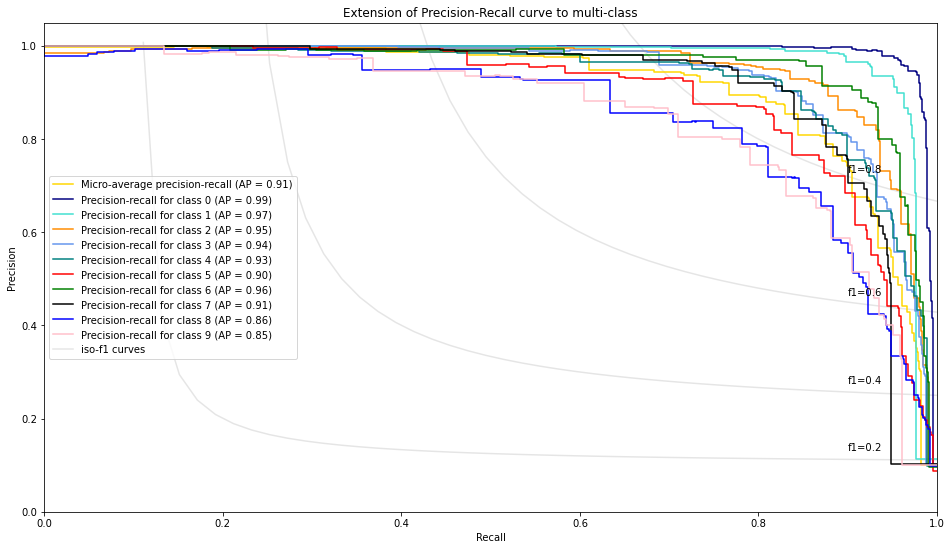

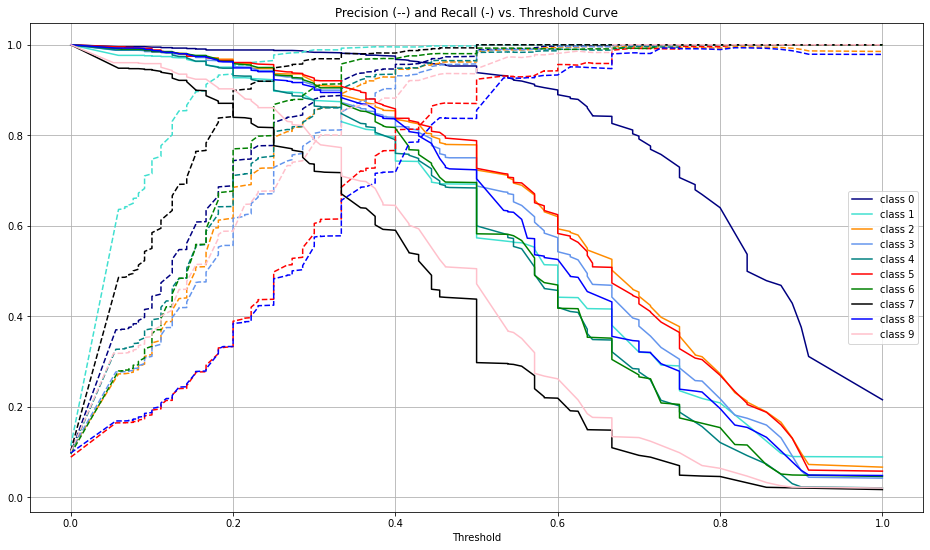

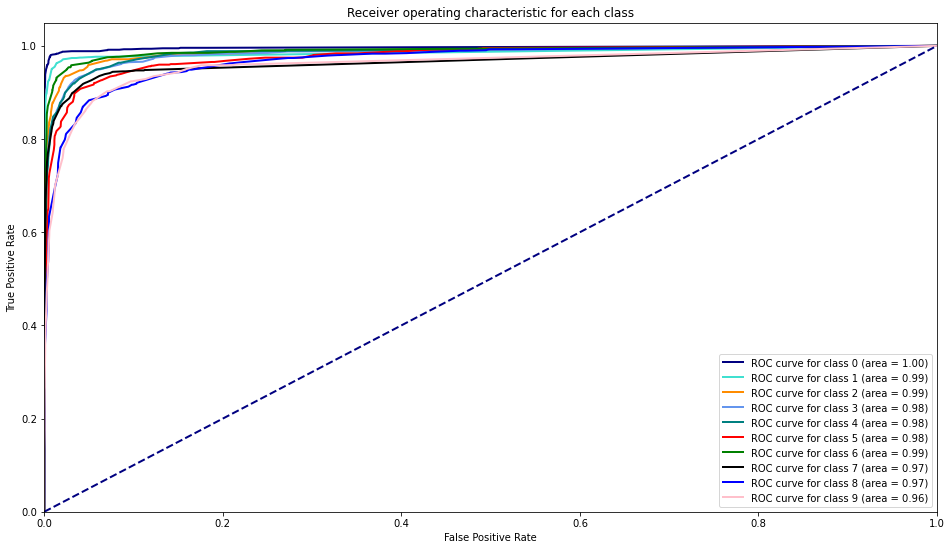

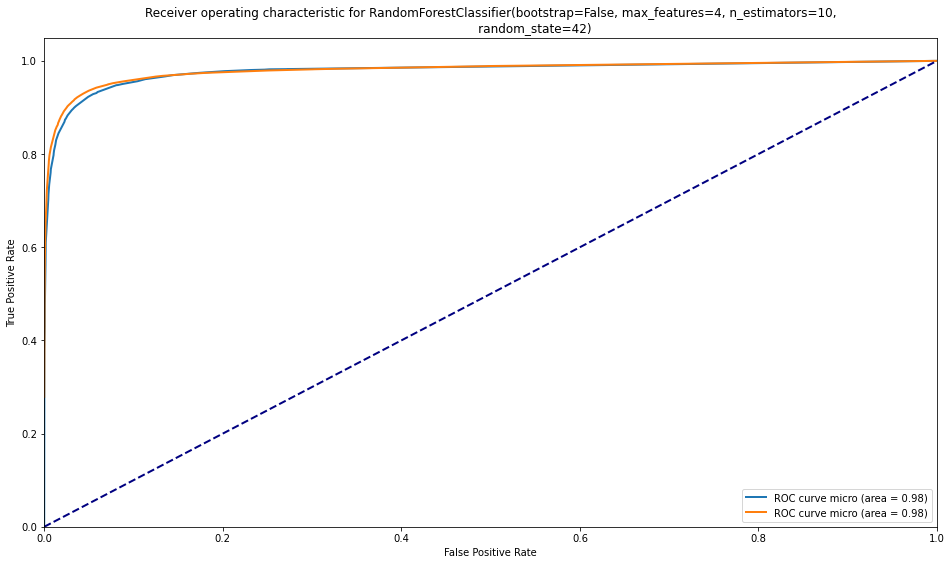

In [34]:
n = 9800
for key in grid_search_models.keys():
    print(f'-----------{key}-----------')
    final_model = grid_search_models[key].best_estimator_
    X_test_prepared = num_pipeline.fit_transform(X_test[0:n])
    y_test_pred = final_model.predict(X_test_prepared)
    conf_mx = confusion_matrix(y_test[0:n], y_test_pred)
    print(conf_mx)
    plot_normalized_confusion_matrix(conf_mx)
    print(classification_report(y_test[0:n], y_test_pred))
    fm = analyze_classifier(final_model, X_test_prepared, y_test[0:n])
    fm.plot_precision_recall_micro()
    fm.plot_precision_recall_classes()
    fm.plot_precision_recall_vs_threshold()
    fm.plot_roc_classes()
    fm.plot_roc_micro_macro()

# Present Your Solution

## Document what you have down.

## Create a nice presentation.
- Make sure you highlight the big picture first.

## Explain why your solution achieves the business objective.

## Don't forget to present interesting points you noticed along the way.
- Describe what worked and what did not.
- List your assumptions and your system's limitations.

## Ensure your key findings are communicated through beautiful visalizations or easy-to-remember statements.

# Launch!

## Get your solution ready for production (plug into production data inputs, write unit tests, etc.).

## Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.
- Beware of slow degradation: models tend to "rot" as data evolves.
- Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
- Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is particularly important for online learning systems.

## Retrain your models on regular basis on fresh data (automate as much as possible).